In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl 

In [2]:
#df=pd.read_excel(r"C:\Users\hridy\Documents\Innomatics\data.xlsx")
df=openpyxl.load_workbook(r"C:\Users\hridy\Documents\Innomatics\data.xlsx")
sheet = df.active
df = pd.DataFrame(sheet.values)
first_row = df.iloc[0]
df.columns = first_row
df=df.iloc[1:, :]

In [3]:
df.head()

0      ID   Salary                  DOJ                  DOL  \
1  203097   420000  2012-06-01 00:00:00              present   
2  579905   500000  2013-09-01 00:00:00              present   
3  810601   325000  2014-06-01 00:00:00              present   
4  267447  1100000  2011-07-01 00:00:00              present   
5  343523   200000  2014-03-01 00:00:00  2015-03-01 00:00:00   

0               Designation    JobCity Gender                  DOB  \
1   senior quality engineer  Bangalore      f  1990-02-19 00:00:00   
2         assistant manager     Indore      m  1989-10-04 00:00:00   
3          systems engineer    Chennai      f  1992-08-03 00:00:00   
4  senior software engineer    Gurgaon      m  1989-12-05 00:00:00   
5                       get    Manesar      m  1991-02-27 00:00:00   

0 10percentage                         10board  ... ComputerScience  \
1         84.3  board ofsecondary education,ap  ...              -1   
2         85.4                            cbse  ...              -1   
3           85                            cbse  ...              -1   
4         85.6                            cbse  ...              -1   
5           78                            cbse  ...              -1   

0 MechanicalEngg ElectricalEngg TelecomEngg CivilEngg conscientiousness  \
1             -1             -1          -1        -1            0.9737   
2             -1             -1          -1        -1           -0.7335   
3             -1             -1          -1        -1            0.2718   
4             -1             -1          -1        -1            0.0464   
5             -1             -1          -1        -1            -0.881   

0 agreeableness extraversion nueroticism openess_to_experience  
1        0.8128       0.5269      1.3549               -0.4455  
2        0.3789       1.2396     -0.1076                0.8637  
3        1.7109       0.1637     -0.8682                0.6721  
4        0.3448       -0.344     -0.4078               -0.9194  
5       -0.2793      -1.0697     0.09163               -0.1295  

[5 rows x 38 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 1 to 3998
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     3998 non-null   object
 1   Salary                 3998 non-null   object
 2   DOJ                    3998 non-null   object
 3   DOL                    3998 non-null   object
 4   Designation            3998 non-null   object
 5   JobCity                3998 non-null   object
 6   Gender                 3998 non-null   object
 7   DOB                    3998 non-null   object
 8   10percentage           3998 non-null   object
 9   10board                3998 non-null   object
 10  12graduation           3998 non-null   object
 11  12percentage           3998 non-null   object
 12  12board                3998 non-null   object
 13  CollegeID              3998 non-null   object
 14  CollegeTier            3998 non-null   object
 15  Degree               

In [5]:
df.shape

(3998, 38)

In [6]:
cols=df.columns
cols

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object', name=0)

The dataset is of dimension 3998x38 meaning it has 3998 rows and 38 columns.
The columns describe about every individual’s Designation and pertaining details and also their college, specialization and the marks obtained in various examinations focussing mainly on Engineering graduates. The dataset also covers standardized scores of cognitive and personality skills. 




In [7]:
df['DOB'] = pd.to_datetime(df['DOB'])
current_date = pd.to_datetime('today')
df['Age'] = (current_date - df['DOB']).dt.days // 365

In [8]:
#basic statistical values of columns
df.describe()

0                                DOB          Age
count                           3998  3998.000000
mean   1990-12-06 06:01:15.637819008    32.734617
min              1977-10-30 00:00:00    26.000000
25%              1989-11-16 06:00:00    31.000000
50%              1991-03-07 12:00:00    32.000000
75%              1992-03-13 18:00:00    34.000000
max              1997-05-27 00:00:00    46.000000
std                              NaN     1.774886

By exploring the dataset it was found that a few individuals had misspelt the JobCity and hence to convert them to one form, the most known errored city names with their correct spelling was used to map every value.

In [9]:
df['JobCity']=df['JobCity'].str.title()
df['12board']=df['12board'].str.lower()
df['10board']=df['10board'].str.lower()

from fuzzywuzzy import process
def correct_city_names(city):
    if isinstance(city, str):  
        # List of commonly occuring spelling errors in cities
        known_cities = ['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar', 'Hyderabad', 'Noida', 'Kolkata', 'Pune',
                        'Mohali', 'Jhansi', 'Delhi', 'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi', 'Mangalore',
                        'Rewari', 'Ghaziabad', 'Bhiwadi', 'Mysore', 'Rajkot', 'Greater Noida', 'Jaipur', 'Thane',
                        'Maharajganj', 'Thiruvananthapuram', 'Panchkula', 'Coimbatore', 'Dhanbad', 'Lucknow', 'Trivandrum',
                        'Gandhinagar', 'Una', 'Daman and Diu', 'Visakhapatnam', 'Nagpur', 'Bhagalpur', 'Coimbatore',
                        'Ahmedabad', 'Kochi', 'Bankura', 'Kanpur', 'Vijayawada', 'Beawar', 'Alwar', 'Australia',
                        'Cheyyar', 'Sonepat', 'Pantnagar', 'Jagdalpur', 'Angul', 'Baroda', 'Ariyalur', 'Jowai', 'Neemrana',
                        'Tirupathi', 'Lucknow']
        
        # Find the closest match for the city name in known_cities
        closest_match = process.extractOne(city, known_cities)[0]
        return closest_match
    else:
        return city  
    
df['JobCity'] = df['JobCity'].apply(correct_city_names)


c:\Python311\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


The data describes how school life of a student may/maynot affect his job. It gives details about their highschool mains marks, the domain they choose at college and the results of AMCAT examination. The data also tells us details about their job.

As an analyst we can analyse the various distribution and come up with insights if marks taken at school affect the salary of the person when they obtain a job. We can also gain various insights about the school board, the mean of the marks, the most common job and salary etc.

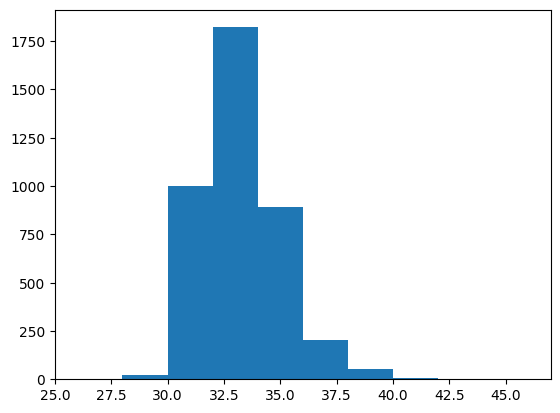

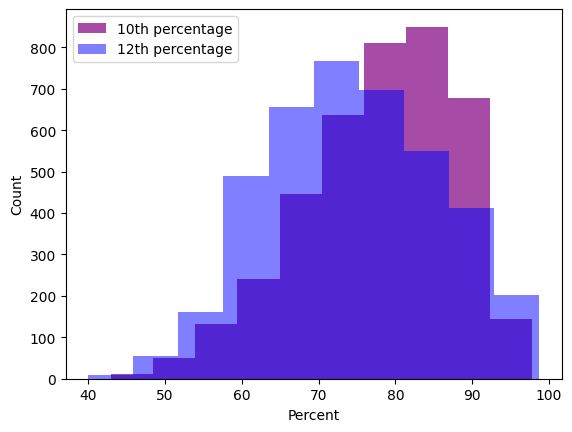

In [10]:
#UNIVARIATE ANALYSIS
plt.hist(df['Age'])
plt.show()

plt.hist(df['10percentage'],color='purple',alpha=0.7,label='10th percentage')
plt.hist(df['12percentage'],color='blue',alpha=0.5,label='12th percentage')
plt.xlabel("Percent")
plt.ylabel("Count")
plt.legend()
plt.show()

Most people lied between ages 31 to 35 
avg 10th score found to be 70% and 12th to be 82% and have cgpa of 70%

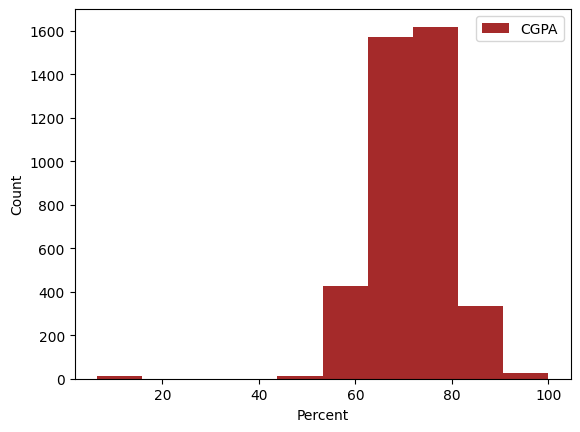

In [11]:
plt.hist(df['collegeGPA'],color='brown',label='CGPA')
plt.xlabel("Percent")
plt.ylabel("Count")
plt.legend()
plt.show()

C:\Users\hridy\AppData\Local\Temp\ipykernel_6892\3100797477.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='GraduationYear', palette='icefire')


Text(0.5, 1.0, 'Count of Graduation Years')

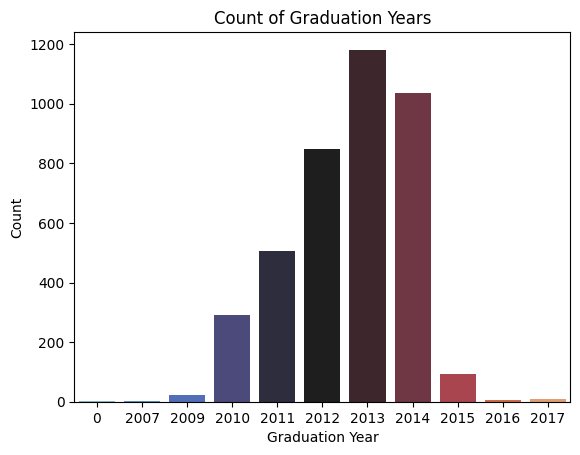

In [12]:
sns.countplot(data=df, x='GraduationYear', palette='icefire')
plt.xlabel('Graduation Year')
plt.ylabel('Count')
plt.title('Count of Graduation Years')

most people graduated in the year 2013

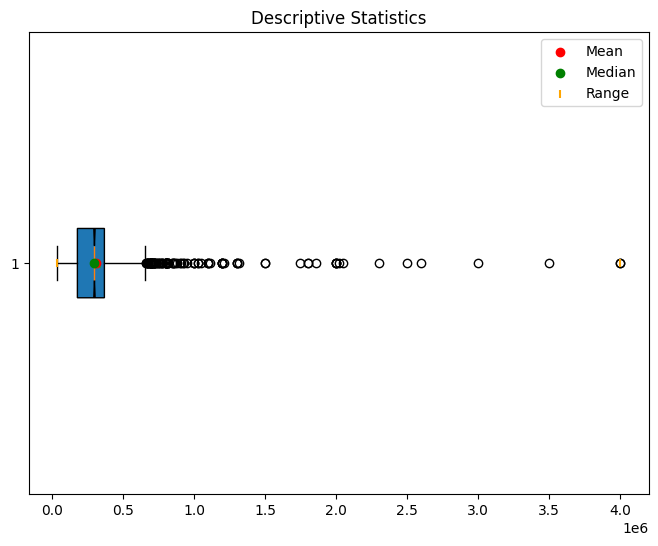

In [13]:
mean = np.mean(df['Salary'])
median = np.median(df['Salary'])
minimum = np.min(df['Salary'])
maximum = np.max(df['Salary'])

plt.figure(figsize=(8, 6))
plt.boxplot(df['Salary'], vert=False, patch_artist=True, notch=True, showmeans=True, showcaps=True, showbox=True)

plt.scatter([mean], [1], color='red', label='Mean', zorder=5)
plt.scatter([median], [1], color='green', label='Median', zorder=5)
plt.scatter([minimum, maximum], [1, 1], marker='|', color='orange', label='Range', zorder=5)
plt.legend()
plt.title('Descriptive Statistics')
plt.show()


most people have salary for 10lakhs, and very few have more than 20Lakhs this maybe due to the difference of skill and hence cannot be considered a proper outlier

C:\Users\hridy\AppData\Local\Temp\ipykernel_6892\3249851952.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

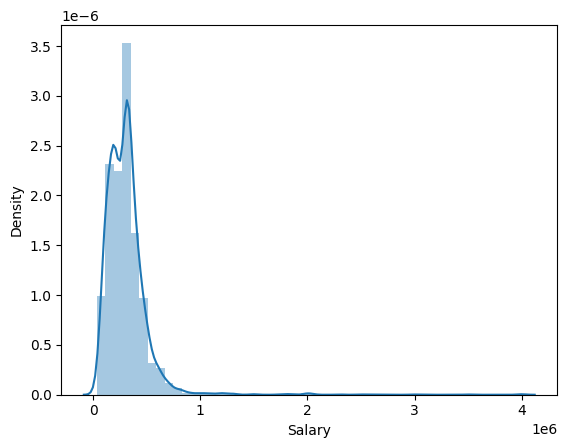

In [14]:
sns.distplot(df['Salary'])

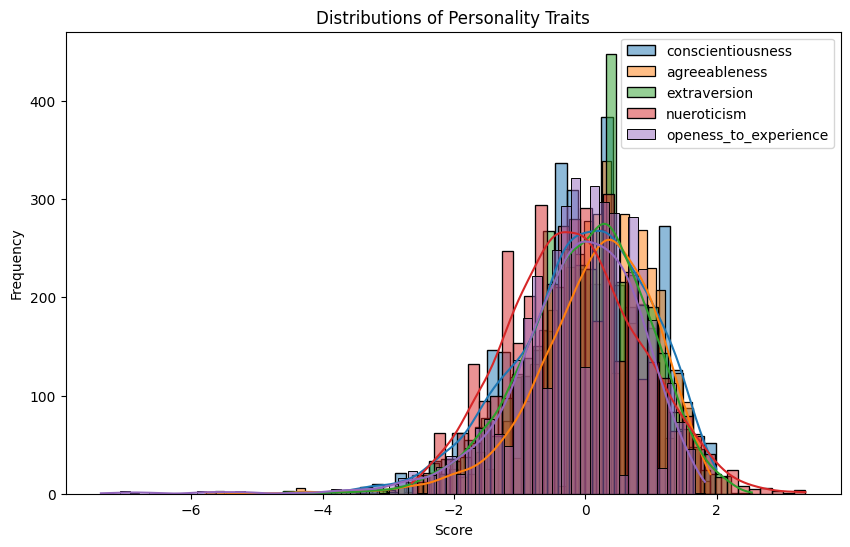

In [15]:
data = df[['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']]

plt.figure(figsize=(10, 6))
for column in data.columns:
    sns.histplot(data[column], kde=True, label=column, alpha=0.5)

plt.title('Distributions of Personality Traits')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Most individuals have a pretty decent score when it comes to cognitive skills

In [16]:
df2=df.copy()
df2.replace(-1,np.nan,inplace=True)
df2.head()

0      ID   Salary        DOJ                  DOL               Designation  \
1  203097   420000 2012-06-01              present   senior quality engineer   
2  579905   500000 2013-09-01              present         assistant manager   
3  810601   325000 2014-06-01              present          systems engineer   
4  267447  1100000 2011-07-01              present  senior software engineer   
5  343523   200000 2014-03-01  2015-03-01 00:00:00                       get   

0    JobCity Gender        DOB  10percentage                         10board  \
1  Bangalore      f 1990-02-19          84.3  board ofsecondary education,ap   
2     Indore      m 1989-10-04          85.4                            cbse   
3    Chennai      f 1992-08-03          85.0                            cbse   
4    Gurgaon      m 1989-12-05          85.6                            cbse   
5    Manesar      m 1991-02-27          78.0                            cbse   

0  ...  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
1  ...             NaN             NaN         NaN        NaN   
2  ...             NaN             NaN         NaN        NaN   
3  ...             NaN             NaN         NaN        NaN   
4  ...             NaN             NaN         NaN        NaN   
5  ...             NaN             NaN         NaN        NaN   

0  conscientiousness agreeableness extraversion  nueroticism  \
1             0.9737        0.8128       0.5269      1.35490   
2            -0.7335        0.3789       1.2396     -0.10760   
3             0.2718        1.7109       0.1637     -0.86820   
4             0.0464        0.3448      -0.3440     -0.40780   
5            -0.8810       -0.2793      -1.0697      0.09163   

0  openess_to_experience  Age  
1                -0.4455   34  
2                 0.8637   34  
3                 0.6721   31  
4                -0.9194   34  
5                -0.1295   33  

[5 rows x 39 columns]

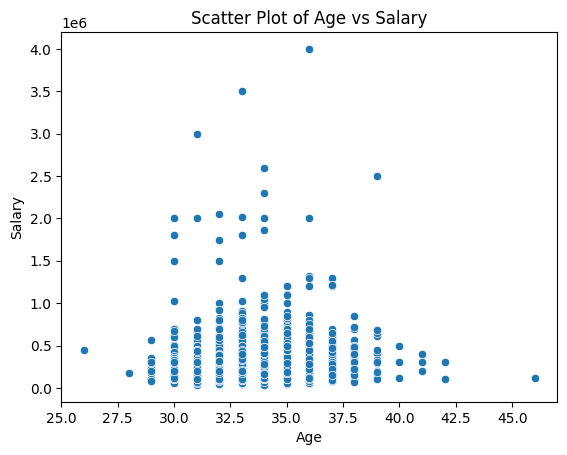

In [17]:
sns.scatterplot(data=df, x='Age', y='Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Scatter Plot of Age vs Salary')
plt.show()

People lying between the age 30 to 32 have a higher salary than older people. This maybe due to the reason that younger people are more energetic and since they are new to the field they are more curious to work

C:\Users\hridy\AppData\Local\Temp\ipykernel_6892\4170221333.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Age',palette='Set1')


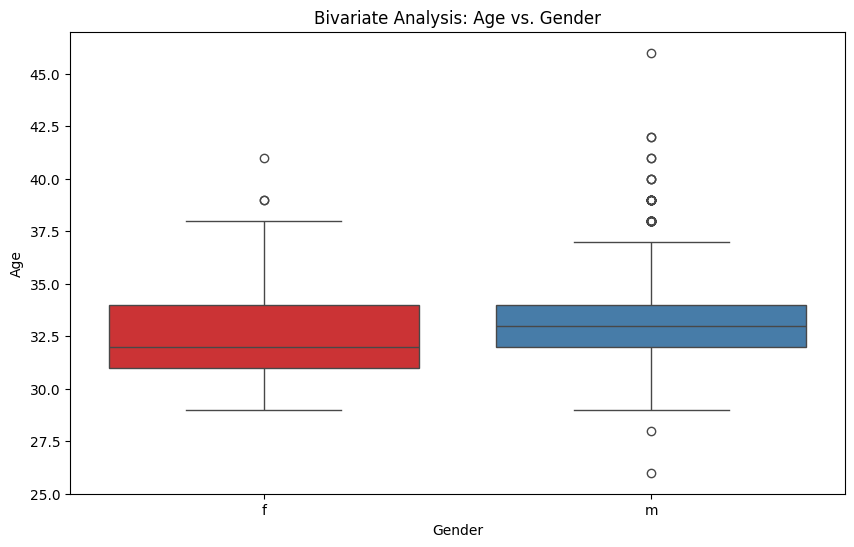

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Age',palette='Set1')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Bivariate Analysis: Age vs. Gender')
plt.show()


<Axes: xlabel='count', ylabel='Gender'>

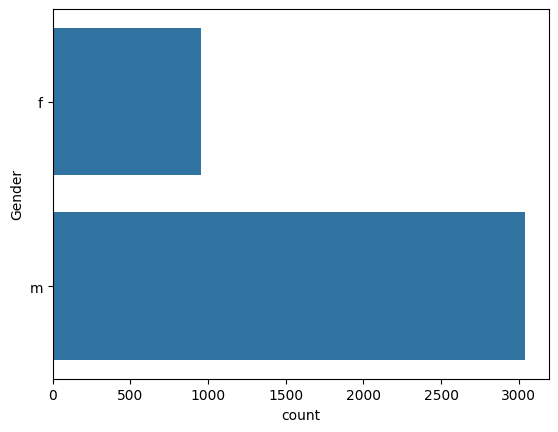

In [19]:
sns.countplot(df["Gender"])

Men dominate the dataset, and are older compared to the women

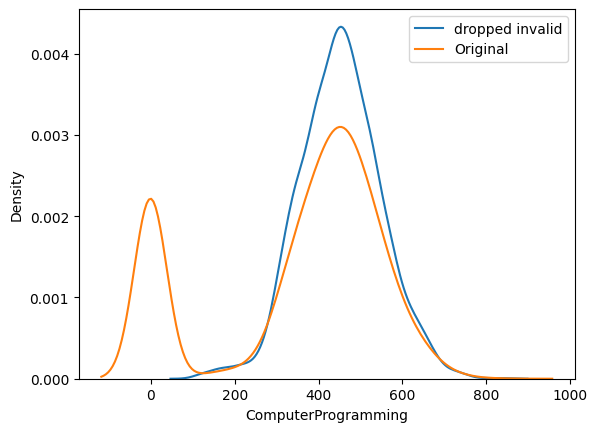

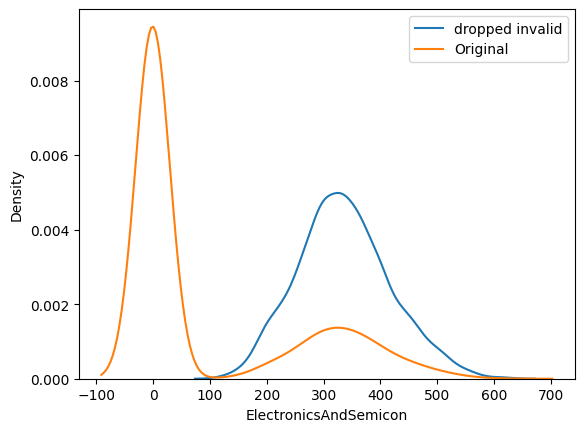

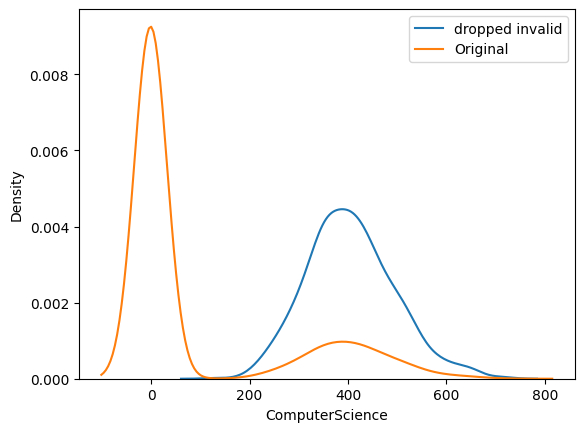

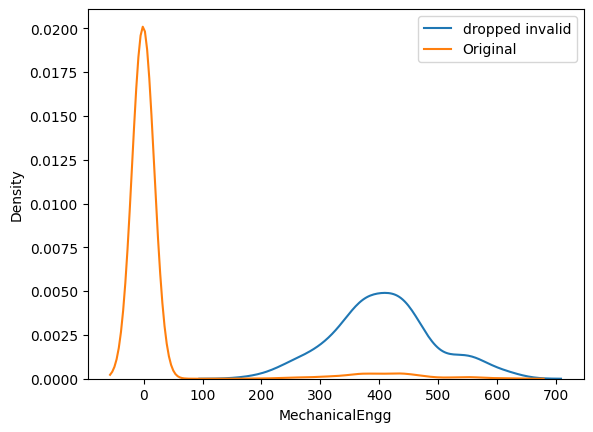

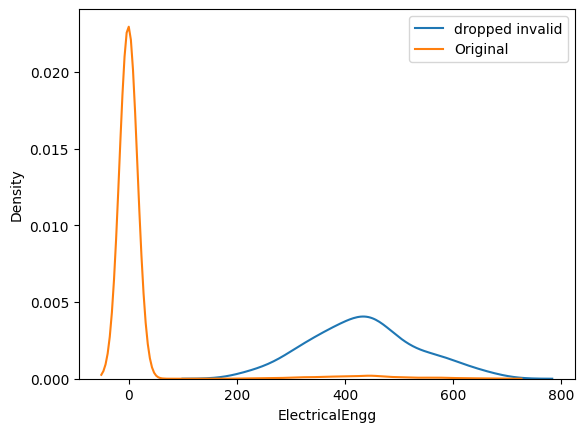

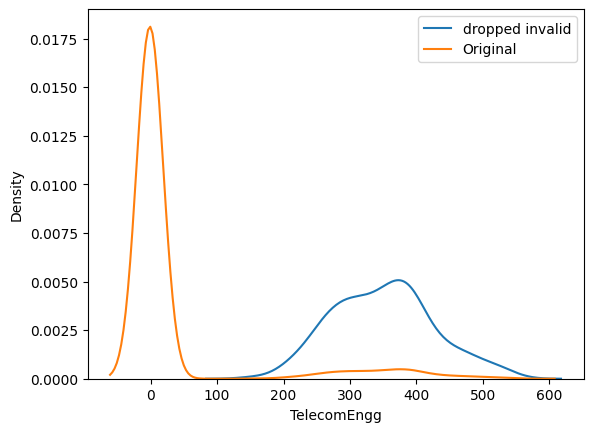

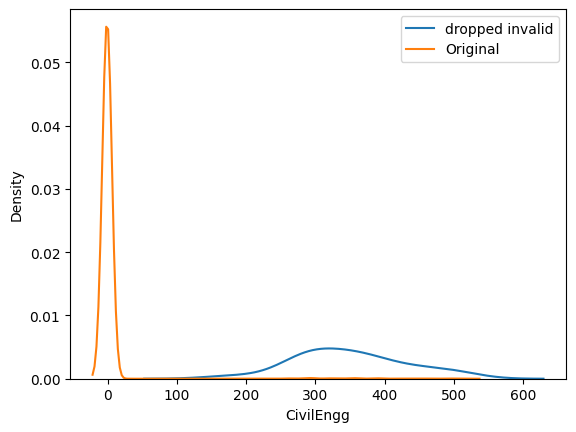

In [20]:
cols=['ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']
for i in cols:
    sns.kdeplot(df2[i].dropna(),label='dropped invalid')
    sns.kdeplot(df[i],label='Original')
    plt.legend()
    plt.show()


technical skill scores were plotted with and without the negative values and By that we realize that negative values of Civil, Telecom, Electric and mech highly affect that data, and hence they must be of larger number and can be dropped

In [21]:
df.drop(columns=['MechanicalEngg','ElectricalEngg', 'TelecomEngg', 'CivilEngg'],axis=1,inplace=True)

In [22]:
df2[['12board','10board']].replace(0,np.nan,inplace=True)
df2[['GraduationYear']].replace(    0,np.nan,inplace=True)
df2['JobCity'].replace(-1,np.nan,inplace=True)

C:\Users\hridy\AppData\Local\Temp\ipykernel_6892\1726664274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['12board','10board']].replace(0,np.nan,inplace=True)
C:\Users\hridy\AppData\Local\Temp\ipykernel_6892\1726664274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['GraduationYear']].replace(    0,np.nan,inplace=True)


In [23]:
df2[['JobCity','12board','10board','GraduationYear']].dropna(inplace=True)
df2[['JobCity','12board','10board','GraduationYear']].head()

C:\Users\hridy\AppData\Local\Temp\ipykernel_6892\938260760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['JobCity','12board','10board','GraduationYear']].dropna(inplace=True)


0    JobCity                             12board  \
1  Bangalore  board of intermediate education,ap   
2     Indore                                cbse   
3    Chennai                                cbse   
4    Gurgaon                                cbse   
5    Manesar                                cbse   

0                         10board  GraduationYear  
1  board ofsecondary education,ap            2011  
2                            cbse            2012  
3                            cbse            2014  
4                            cbse            2011  
5                            cbse            2012

In [24]:
df2['CollegeState'].value_counts() #count of people from each state

CollegeState
Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: count, dtype: int64

In [25]:
# sns.countplot(x='JobCity',data=df2)
# plt.plot()

df2['JobCity'].value_counts() #count of people having jobs at city


JobCity
Bangalore             697
Noida                 395
Hyderabad             372
Pune                  334
Chennai               315
Gurgaon               224
New Delhi             205
Mumbai                126
Kolkata               120
Jaipur                 73
Bhubaneswar            43
Gandhinagar            41
Lucknow                41
Mysore                 40
Ghaziabad              39
Una                    38
Navi Mumbai            36
Bhagalpur              31
Greater Noida          30
Indore                 26
Delhi                  23
Ahmedabad              22
Coimbatore             22
Mohali                 20
Kochi                  18
Visakhapatnam          15
Nagpur                 15
Jagdalpur              13
Kanpur                 13
Alwar                  13
Cheyyar                12
Trivandrum             11
Mangalore              11
Thane                  10
Thiruvananthapuram      9
Panchkula               9
Manesar                 6
Pantnagar               6
Dama

Bangalore is found to be the hub of tech jobs and we can clearly see that many people migrate and come here in search of jobs

[]

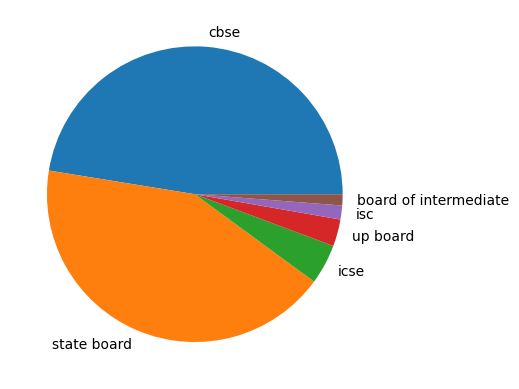

In [26]:
board=df2['12board'].value_counts()
board=board.head(6)
plt.pie(board,labels=board.index)
plt.plot()

[]

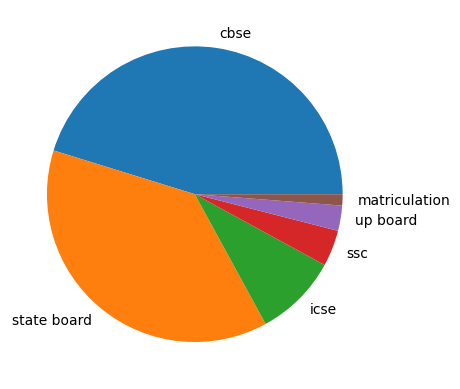

In [27]:
board10=df2['10board'].value_counts()
board10=board10.head(6)
plt.pie(board10,labels=board10.index)
plt.plot()

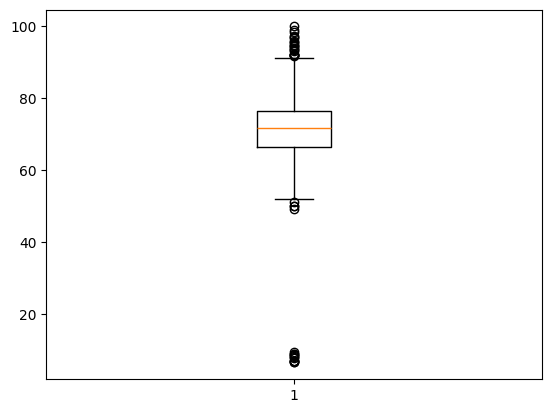

In [28]:
plt.boxplot(df['collegeGPA'])
plt.show()

C:\Users\hridy\AppData\Local\Temp\ipykernel_6892\996157168.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['collegeGPA'])


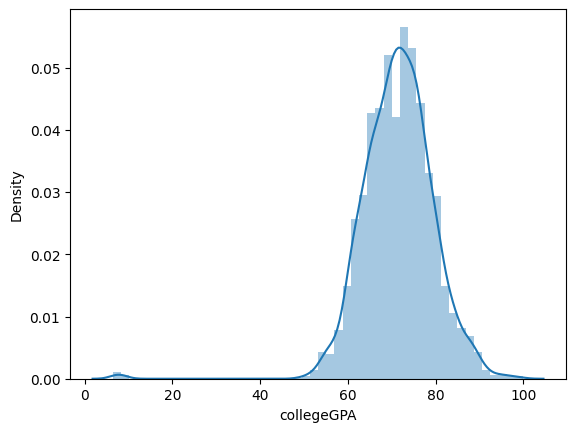

In [29]:
sns.distplot(df['collegeGPA'])
plt.show()

<Axes: xlabel='count', ylabel='CollegeState'>

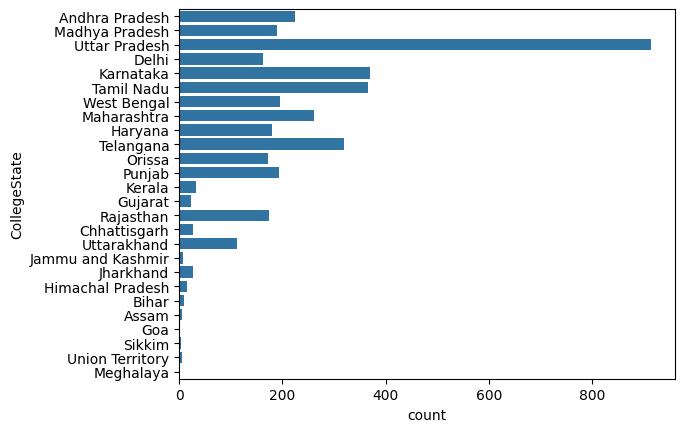

In [30]:
sns.countplot(df['CollegeState'])

<Axes: xlabel='Degree', ylabel='count'>

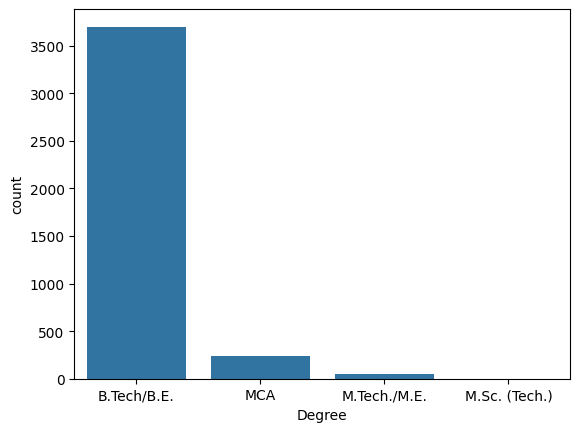

In [31]:
sns.countplot(data=df, x='Degree')

Only a few people decided to pursue higherstudies after undergrad

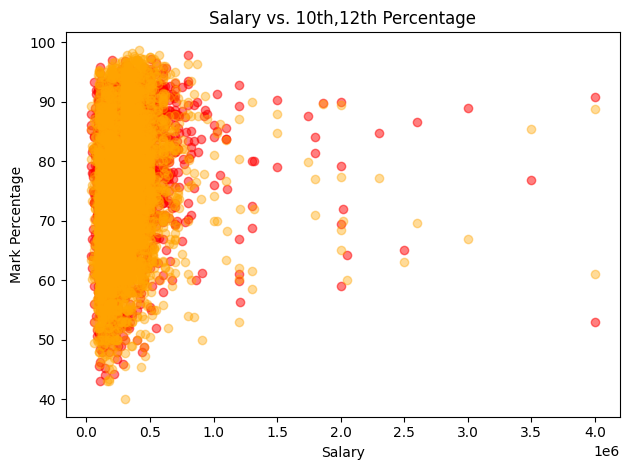

In [32]:
#BIVARIATE ANALYSIS
plt.scatter(df['Salary'], df['10percentage'],color='red',alpha=0.5)
plt.scatter(df['Salary'], df['12percentage'],color='orange',alpha=0.4)
plt.xlabel('Salary')
plt.ylabel('Mark Percentage')
plt.title('Salary vs. 10th,12th Percentage')
plt.tight_layout()
plt.show()

No much correlation between marks scored in highschool and salary, this may imply that skills are what really matters

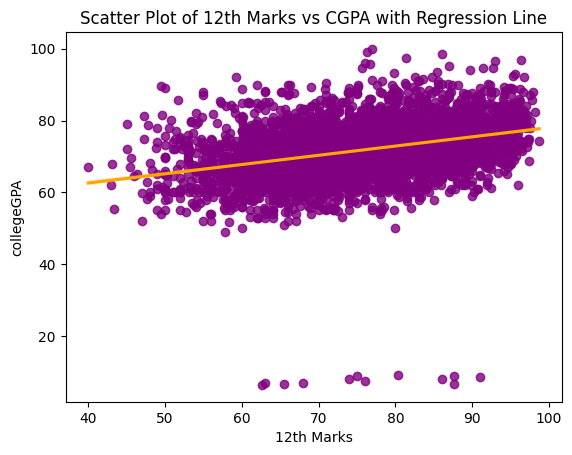

In [33]:
sns.regplot(data=df2, x='12percentage', y='collegeGPA',color='purple',line_kws={"color":'orange'})
plt.xlabel('12th Marks')
plt.ylabel('collegeGPA')
plt.title('Scatter Plot of 12th Marks vs CGPA with Regression Line')
plt.show()

Those who scored better in high school also scored better at college

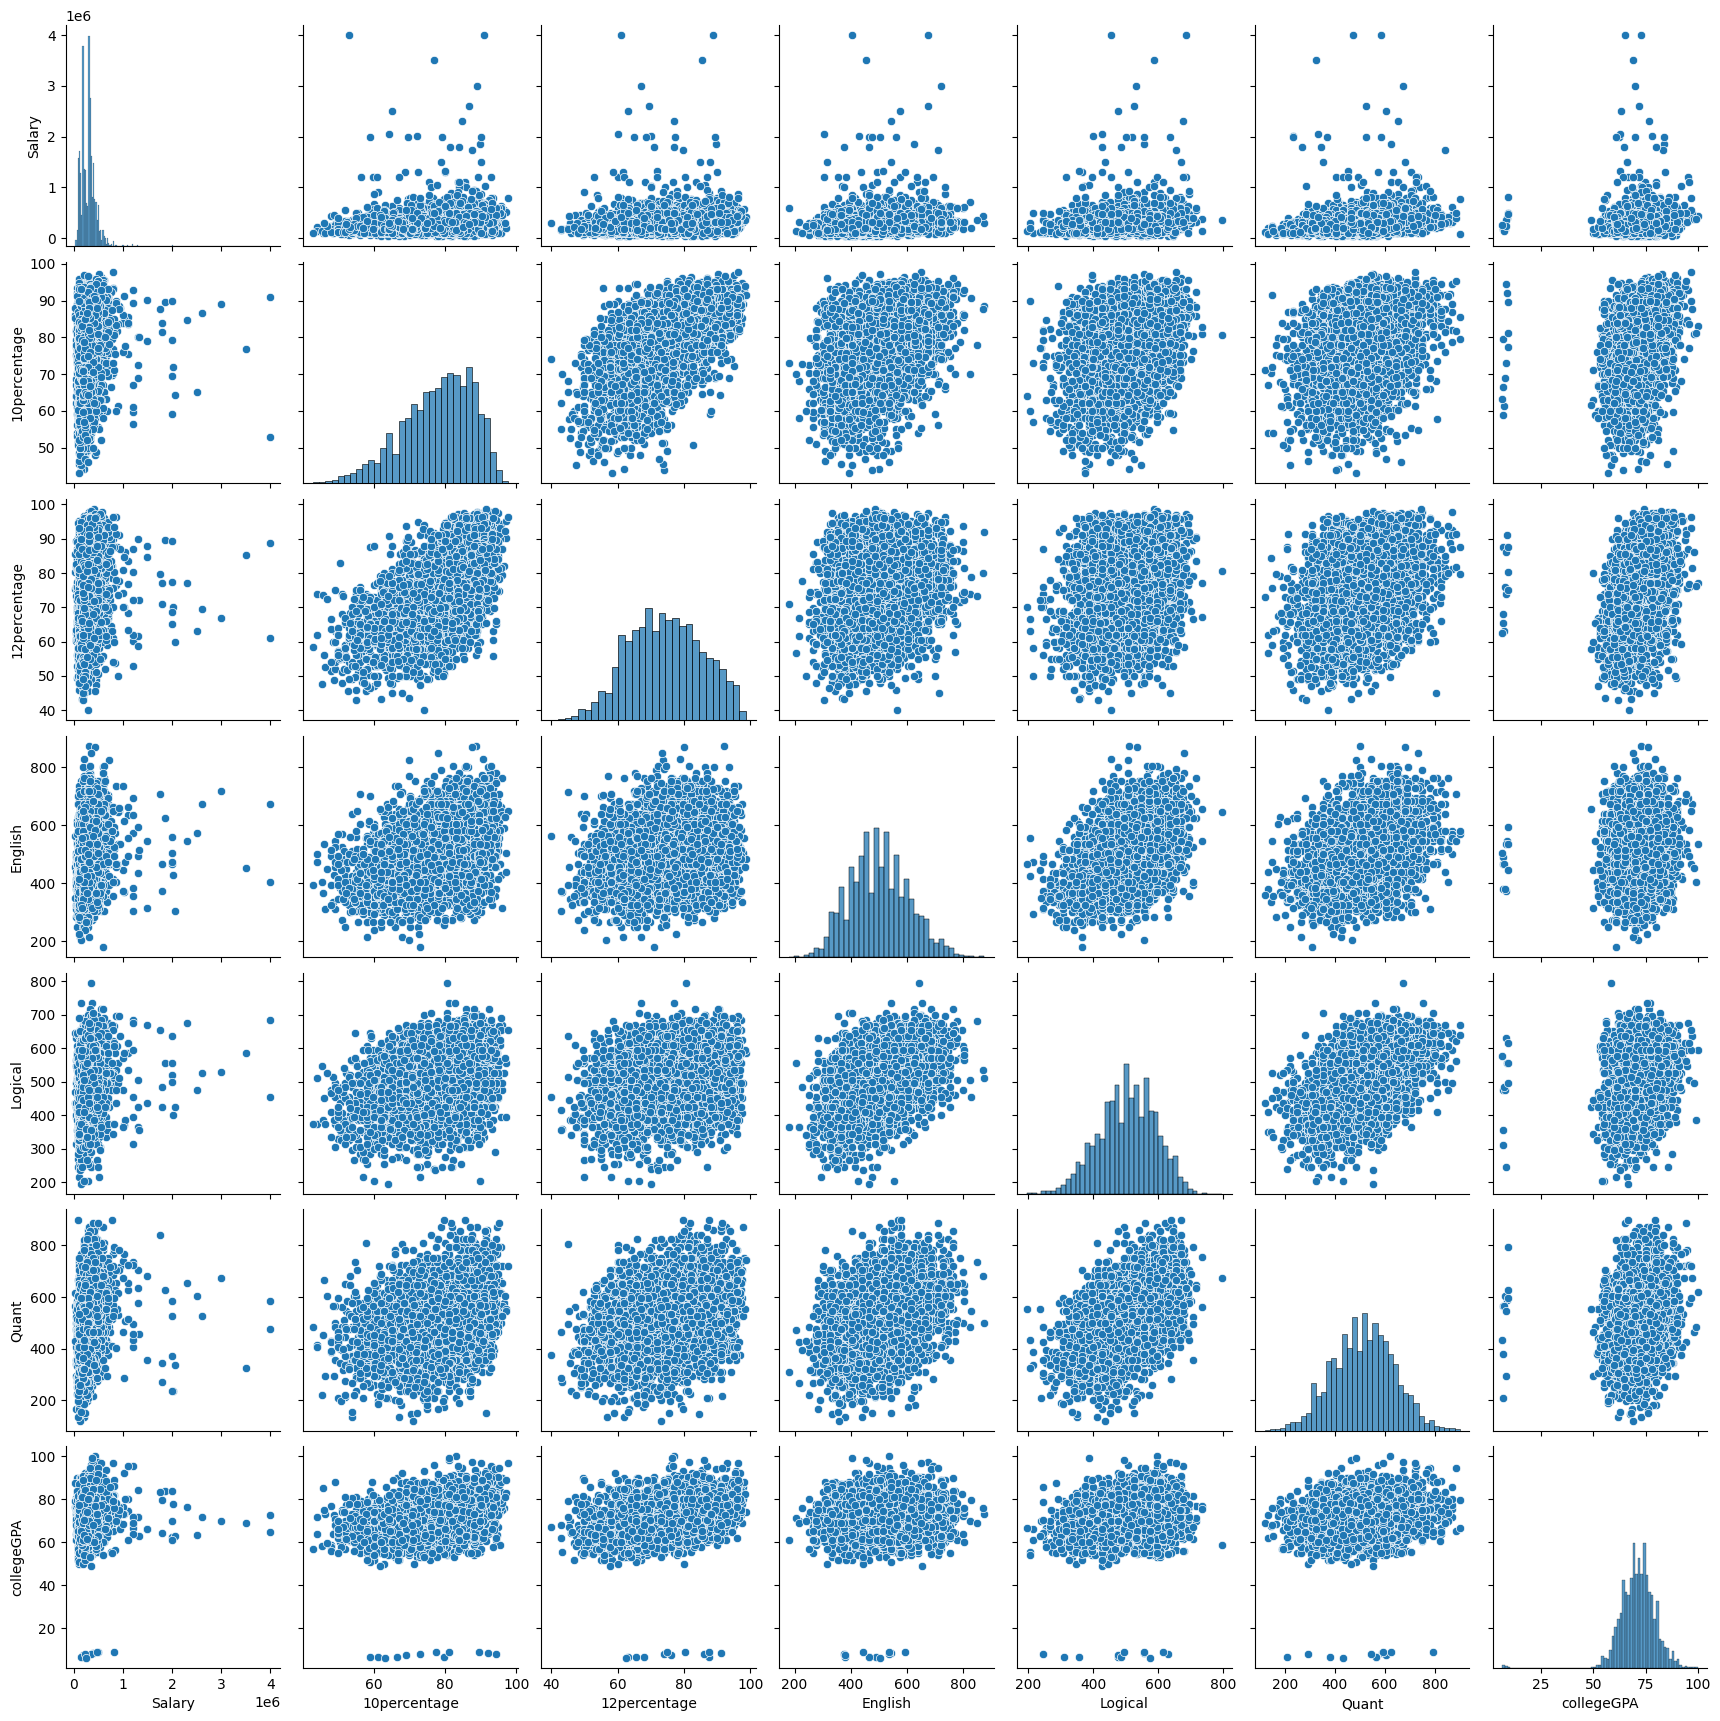

In [34]:
sns.pairplot(df[['Salary', '10percentage', '12percentage', 'English', 'Logical', 'Quant','collegeGPA']])
plt.show()


Better fluency in english and good logical skills always help better in all domains

C:\Users\hridy\AppData\Local\Temp\ipykernel_6892\1362104759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Gender', y='Salary',palette=palette)


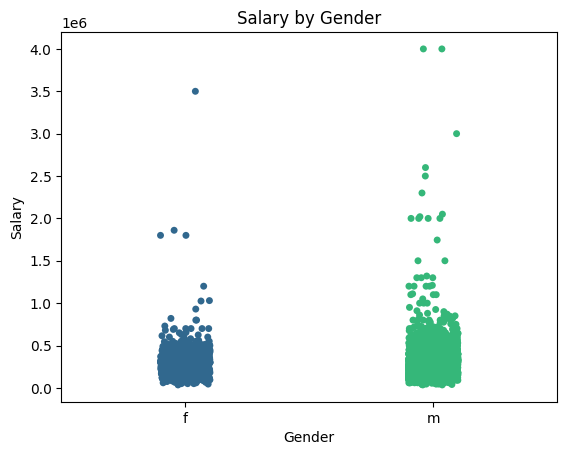

In [35]:
palette = sns.color_palette("viridis", df['CollegeTier'].nunique())  
sns.stripplot(data=df, x='Gender', y='Salary',palette=palette)
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Salary by Gender')
plt.show()


male seem to get more salary than female, this maynot always be true because the ratio of female to male is highly disproportionate in this dataset

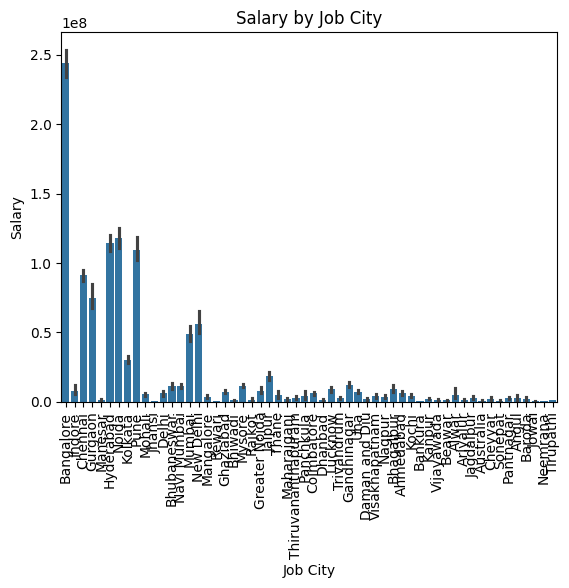

In [36]:
sns.barplot(data=df2, x='JobCity', y='Salary', estimator=sum)
plt.xlabel('Job City')
plt.ylabel('Salary')
plt.title('Salary by Job City')
plt.xticks(rotation=90)
plt.show()


C:\Users\hridy\AppData\Local\Temp\ipykernel_6892\1808121740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mean_salary_by_city, x='Salary', y='JobCity', palette='viridis')


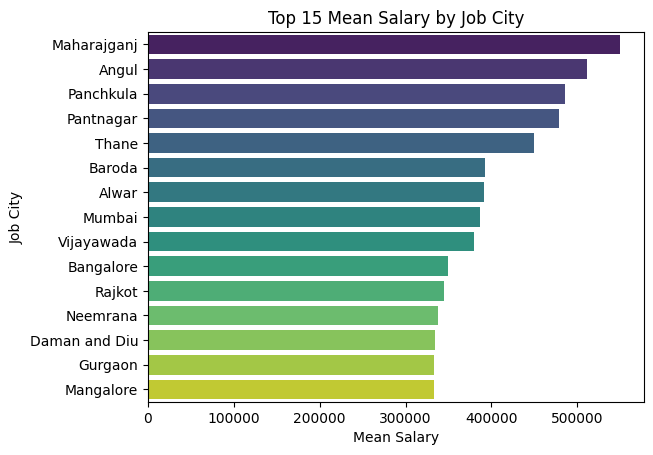

In [37]:
mean_salary_by_city = df2.groupby('JobCity')['Salary'].mean().reset_index()
mean_salary_by_city = mean_salary_by_city.sort_values(by='Salary', ascending=False)
top_n_cities = 15
top_mean_salary_by_city = mean_salary_by_city.head(top_n_cities)
sns.barplot(data=top_mean_salary_by_city, x='Salary', y='JobCity', palette='viridis')
plt.xlabel('Mean Salary')
plt.ylabel('Job City')
plt.title(f'Top {top_n_cities} Mean Salary by Job City')
plt.show()

banglore has the highest salary however when plotting the mean values, Maharajganj seems to be better. This is due to the higly extreme values of salary and skill of people

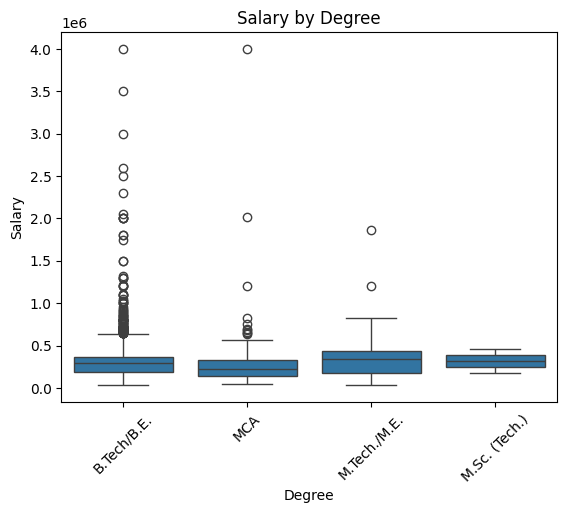

In [38]:
sns.boxplot(data=df, x='Degree', y='Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.title('Salary by Degree')
plt.xticks(rotation=45)
plt.show()

c:\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 94.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 55.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 95.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 61.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


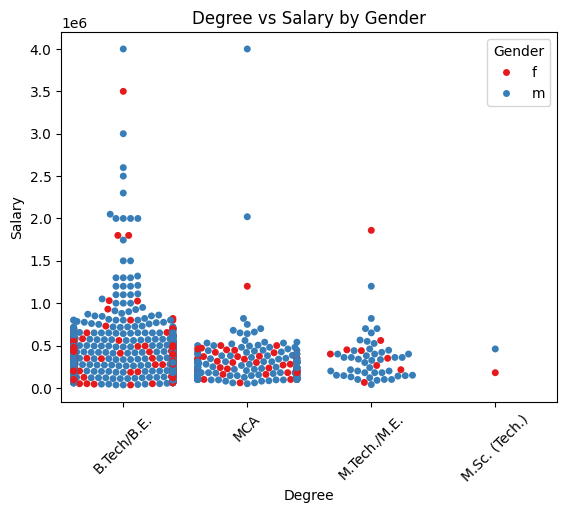

In [39]:

sns.swarmplot(data=df, x='Degree', y='Salary', hue='Gender', palette='Set1')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.title('Degree vs Salary by Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


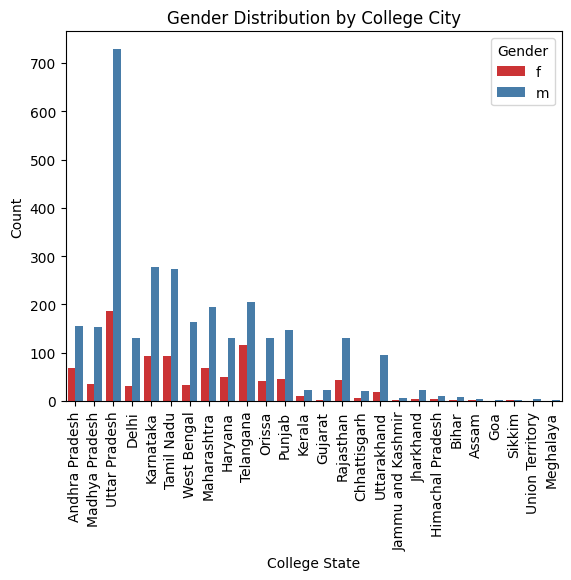

In [40]:
sns.countplot(data=df, x='CollegeState', hue='Gender', palette='Set1')
plt.xlabel('College State')
plt.ylabel('Count')
plt.title('Gender Distribution by College City')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.show()

there is a very high imbalance in gender when it comes to UttarPradesh, this maybe due to social reasons 

C:\Users\hridy\AppData\Local\Temp\ipykernel_6892\4260336339.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='collegeGPA',palette='Set2')


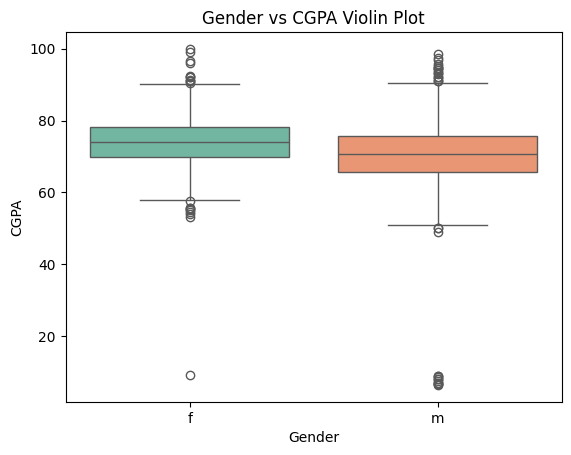

In [41]:
sns.boxplot(data=df, x='Gender', y='collegeGPA',palette='Set2')
plt.xlabel('Gender')
plt.ylabel('CGPA')
plt.title('Gender vs CGPA Violin Plot')
plt.show()

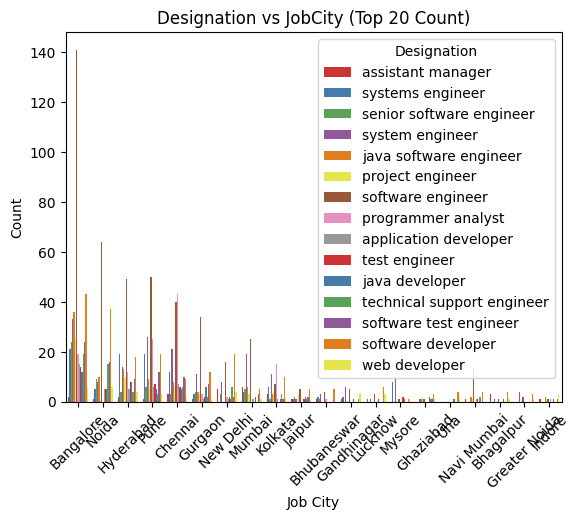

In [42]:
top_20_jobcities = df['JobCity'].value_counts().head(20).index
top_20_designations = df['Designation'].value_counts().head(15).index
df_top_20 = df[df['JobCity'].isin(top_20_jobcities) & df['Designation'].isin(top_20_designations)]

sns.countplot(data=df_top_20, x='JobCity', hue='Designation', order=top_20_jobcities, palette='Set1')
plt.xlabel('Job City')
plt.ylabel('Count')
plt.title('Designation vs JobCity (Top 20 Count)')
plt.xticks(rotation=45)
plt.legend(title='Designation', loc='upper right')
plt.show()

bangalore is dominated by software engineers and product engineers

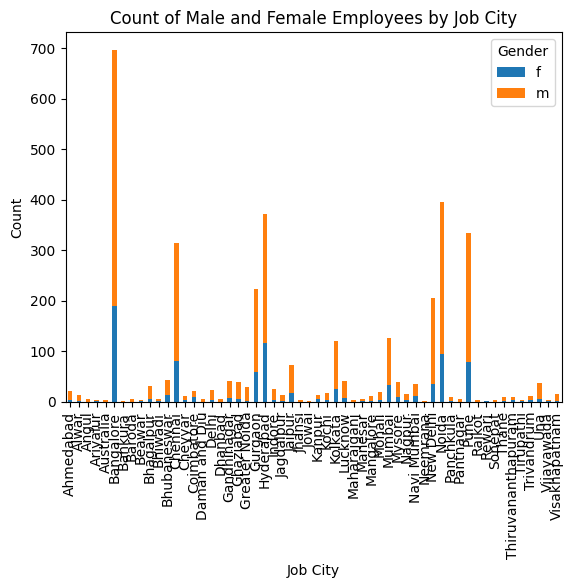

In [43]:
pd.crosstab(df['JobCity'], df['Gender']).plot(kind='bar', stacked=True)
plt.xlabel('Job City')
plt.ylabel('Count')
plt.title('Count of Male and Female Employees by Job City')
plt.xticks(rotation=90)
plt.show()


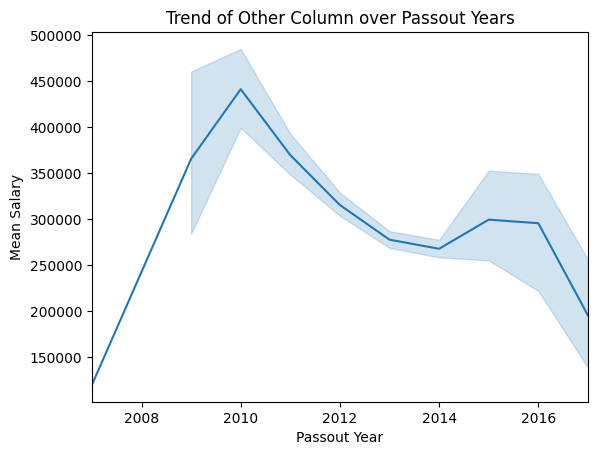

In [44]:
sns.lineplot(data=df, x='GraduationYear', y='Salary', estimator='mean')
plt.xlim(2007, 2017)
plt.xlabel('Passout Year')
plt.ylabel('Mean Salary')
plt.title('Trend of Other Column over Passout Years')
plt.show()

2010 passouts seem to have the most salary. This maybe due to experience

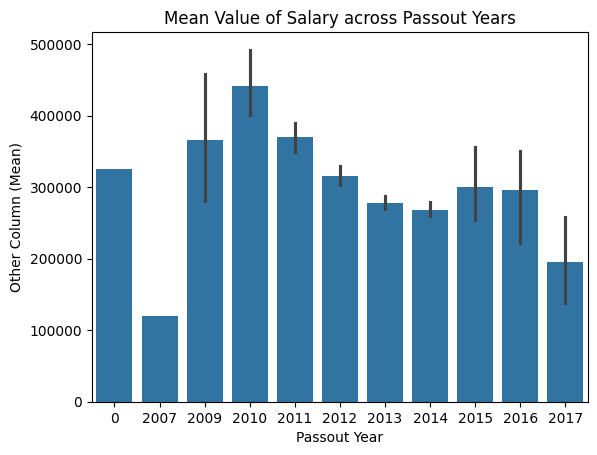

In [45]:
sns.barplot(data=df2, x='GraduationYear', y='Salary', estimator='mean')
plt.xlabel('Passout Year')
plt.ylabel('Other Column (Mean)')
plt.title('Mean Value of Salary across Passout Years')
plt.show()

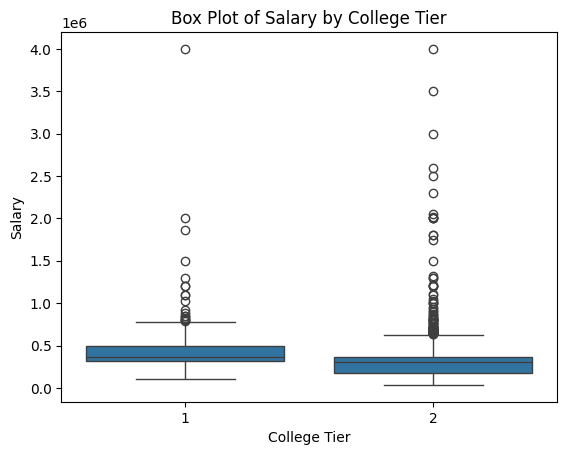

In [46]:
sns.boxplot(data=df, x='CollegeTier', y='Salary')
plt.xlabel('College Tier')
plt.ylabel('Salary')
plt.title('Box Plot of Salary by College Tier')
plt.show()


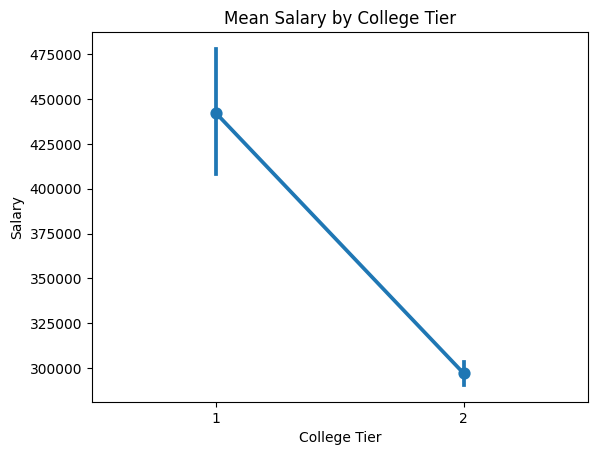

In [47]:
sns.pointplot(data=df, x='CollegeTier', y='Salary')
plt.xlabel('College Tier')
plt.ylabel('Salary')
plt.title('Mean Salary by College Tier')
plt.show()


C:\Users\hridy\AppData\Local\Temp\ipykernel_6892\1572222806.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x='CollegeTier', y='collegeGPA',palette=palette)
c:\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 73.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 84.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


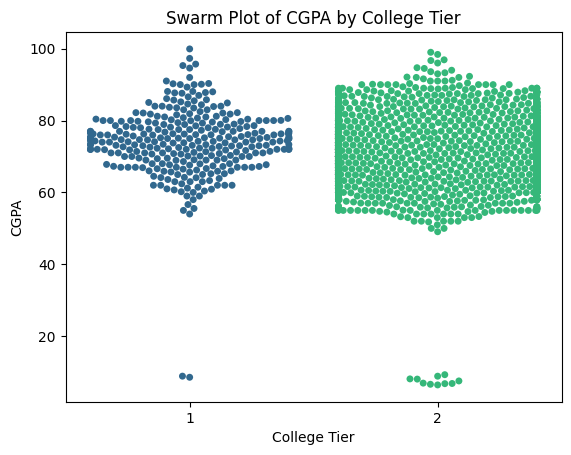

In [48]:
palette = sns.color_palette("viridis", df['CollegeTier'].nunique()) 
sns.swarmplot(data=df, x='CollegeTier', y='collegeGPA',palette=palette)
plt.xlabel('College Tier')
plt.ylabel('CGPA')
plt.title('Swarm Plot of CGPA by College Tier')
plt.show()


C:\Users\hridy\AppData\Local\Temp\ipykernel_6892\3819339376.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='CollegeTier', y='collegeGPA',palette=palette)


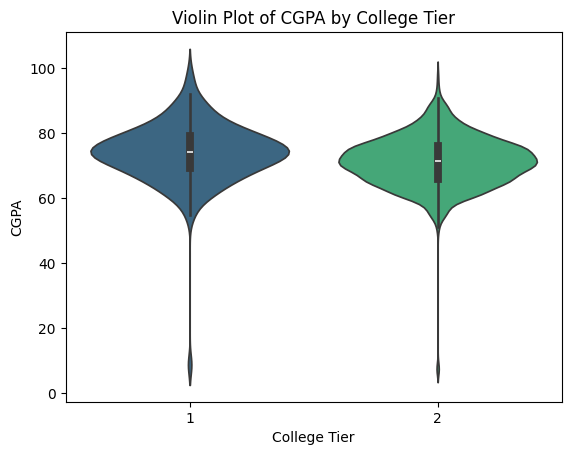

In [49]:
sns.violinplot(data=df, x='CollegeTier', y='collegeGPA',palette=palette)
plt.xlabel('College Tier')
plt.ylabel('CGPA')
plt.title('Violin Plot of CGPA by College Tier')
plt.show()


C:\Users\hridy\AppData\Local\Temp\ipykernel_6892\2812952251.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mean_cgpa_by_state, x='CollegeState', y='collegeGPA', palette='viridis')


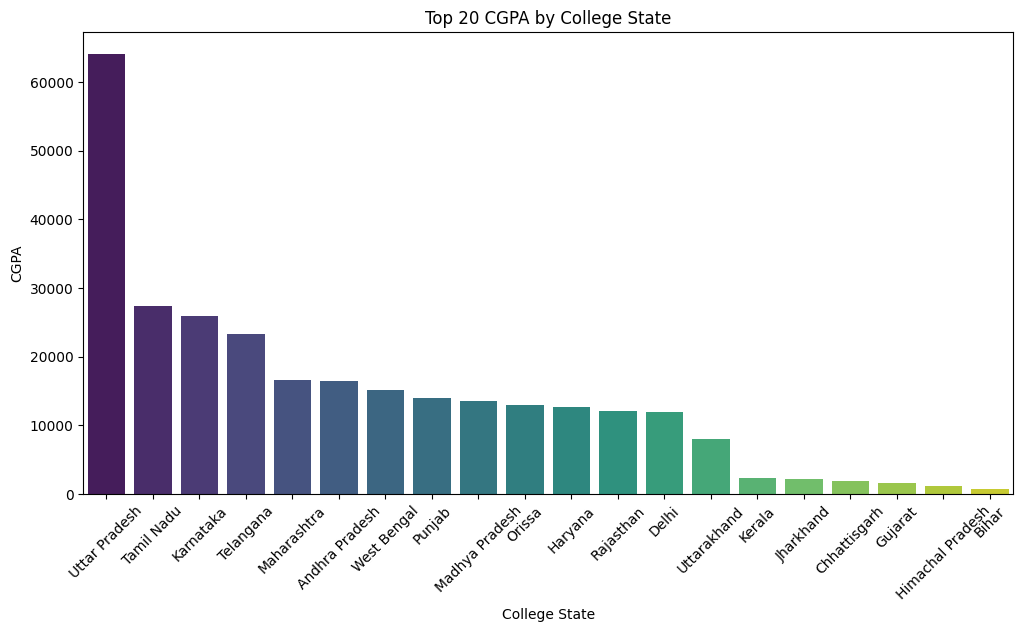

In [50]:
mean_cgpa_by_state = df.groupby('CollegeState')['collegeGPA'].sum().reset_index()
mean_cgpa_by_state = mean_cgpa_by_state.sort_values(by='collegeGPA', ascending=False)
top_n_states = 20
top_mean_cgpa_by_state = mean_cgpa_by_state.head(top_n_states)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_mean_cgpa_by_state, x='CollegeState', y='collegeGPA', palette='viridis')
plt.xlabel('College State')
plt.ylabel('CGPA')
plt.title(f'Top {top_n_states} CGPA by College State')
plt.xticks(rotation=45)
plt.show()


college aggregate of students of UP is better 

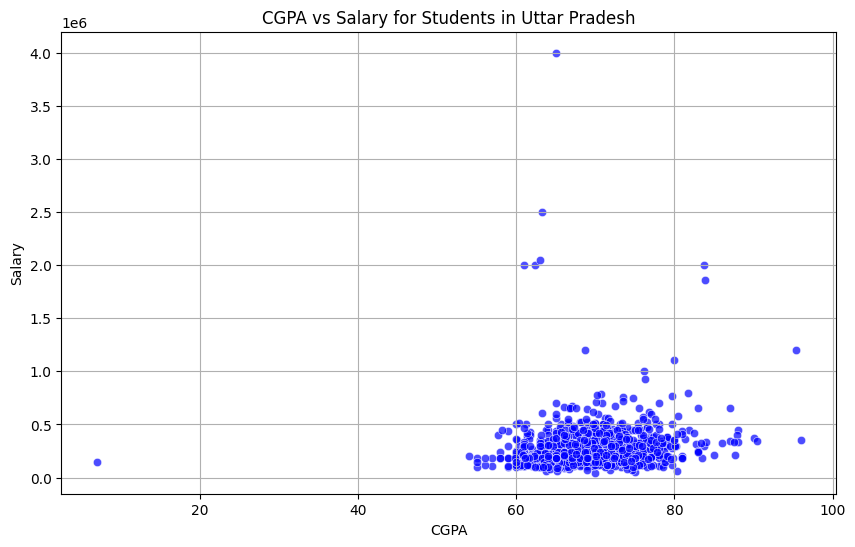

In [51]:
up_students = df[df['CollegeState'] == 'Uttar Pradesh']

# Plot scatter plot of CGPA vs Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=up_students, x='collegeGPA', y='Salary', color='blue', alpha=0.7)
plt.xlabel('CGPA')
plt.ylabel('Salary')
plt.title('CGPA vs Salary for Students in Uttar Pradesh')
plt.grid(True)
plt.show()

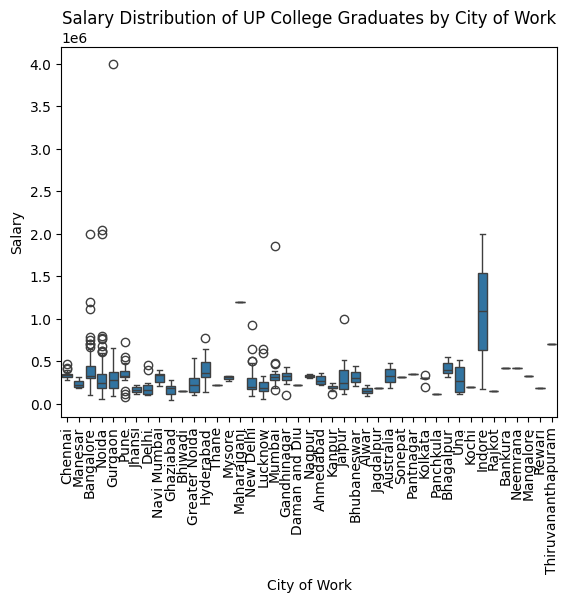

In [53]:
sns.boxplot(data=up_students, x='JobCity', y='Salary')
plt.xlabel('City of Work')
plt.ylabel('Salary')
plt.title('Salary Distribution of UP College Graduates by City of Work')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

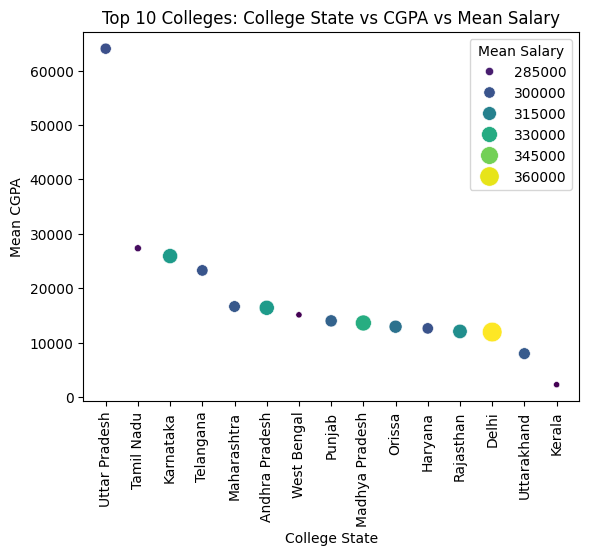

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean CGPA and mean salary for each college
college_stats = df.groupby('CollegeState').agg({'collegeGPA': 'sum', 'Salary': 'mean'}).reset_index()
college_stats.columns = ['CollegeState', 'totCGPA', 'MeanSalary']

top_10_colleges = college_stats.sort_values(by='totCGPA', ascending=False).head(15)
sns.scatterplot(data=top_10_colleges, x='CollegeState', y='totCGPA', hue='MeanSalary', palette='viridis', size='MeanSalary', sizes=(20, 200))

plt.xlabel('College State')
plt.ylabel('Mean CGPA')
plt.title('Top 10 Colleges: College State vs CGPA vs Mean Salary')
plt.xticks(rotation=90)
plt.legend(title='Mean Salary')
plt.show()


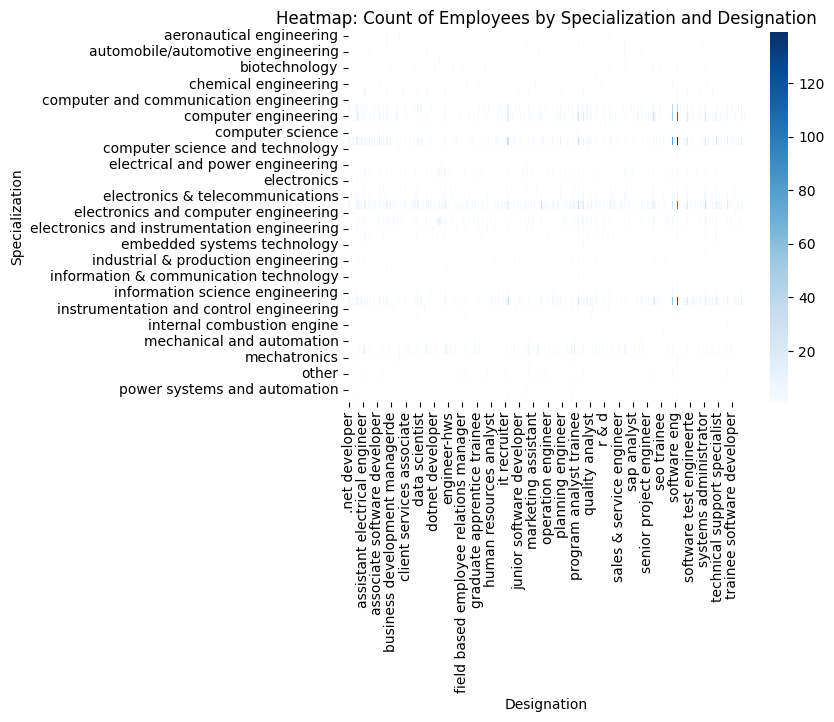

In [ ]:
pivot_table = df.pivot_table(index='Specialization', columns='Designation', aggfunc='size')
sns.heatmap(pivot_table, cmap='Blues')
plt.title('Heatmap: Count of Employees by Specialization and Designation')
plt.xlabel('Designation')
plt.ylabel('Specialization')
plt.show()


Most people who specialised in CSE got a job as software engineer

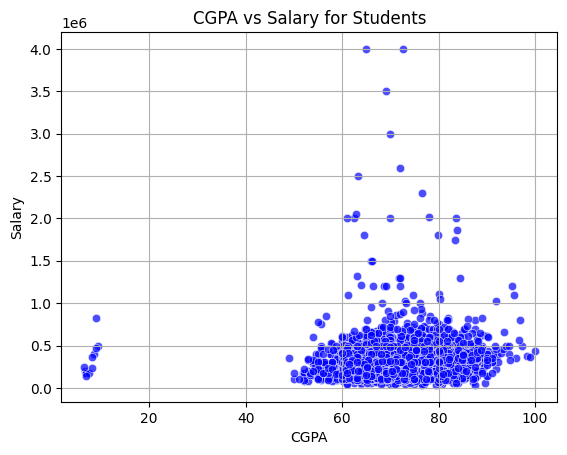

In [ ]:

sns.scatterplot(data=df2, x='collegeGPA', y='Salary', color='blue', alpha=0.7)
plt.xlabel('CGPA')
plt.ylabel('Salary')
plt.title('CGPA vs Salary for Students')
plt.grid(True)
plt.show()

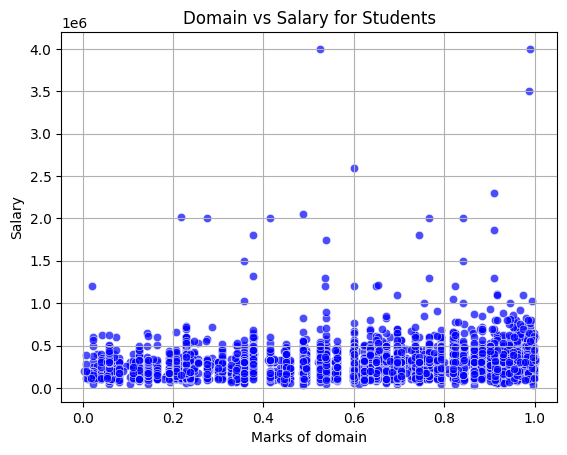

In [ ]:

sns.scatterplot(data=df2, x='Domain', y='Salary', color='blue', alpha=0.7)
plt.xlabel('Marks of domain')
plt.ylabel('Salary')
plt.title('Domain vs Salary for Students')
plt.grid(True)
plt.show()

To a certain extent, increase in marks in domain increases salary

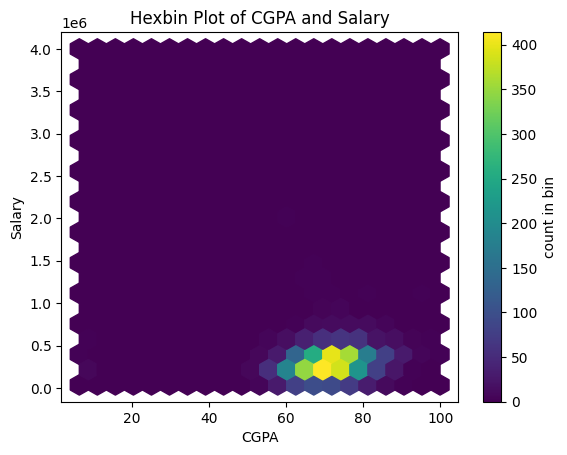

In [ ]:
plt.hexbin(df2['collegeGPA'], df2['Salary'], gridsize=20, cmap='viridis')
plt.xlabel('CGPA')
plt.ylabel('Salary')
plt.title('Hexbin Plot of CGPA and Salary')
plt.colorbar(label='count in bin')
plt.show()


In [ ]:
df['DOL'] = df['DOL'].replace('present', np.NaN)
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['DOL'] = pd.to_datetime(df['DOL'])
df3 = df[df['DOL'].notnull()]
df3['tenure'] = (df3['DOL'] - df3['DOJ']).dt.days
df3.head()

C:\Users\hridy\AppData\Local\Temp\ipykernel_20768\2357270845.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['tenure'] = (df3['DOL'] - df3['DOJ']).dt.days


0       ID  Salary        DOJ        DOL              Designation    JobCity  \
5   343523  200000 2014-03-01 2015-03-01                      get    Manesar   
7   947847  300000 2014-08-01 2015-05-01   java software engineer  Bangalore   
8   912934  400000 2014-07-01 2015-07-01      mechanical engineer  Bangalore   
11   87291  600000 2011-04-01 2015-04-01     senior php developer  Bangalore   
12  190393  450000 2011-08-01 2014-10-01  senior systems engineer       Pune   

0  Gender                  DOB 10percentage          10board  ...    Domain  \
5       m  1991-02-27 00:00:00           78             cbse  ...  0.124502   
7       m  1993-02-01 00:00:00        86.08      state board  ...  0.356536   
8       m  1992-05-27 00:00:00           92             cbse  ...  0.829585   
11      m  1989-06-24 00:00:00         88.6  mp board bhopal  ...  0.765674   
12      m  1990-02-10 00:00:00           81             cbse  ...  0.968237   

0  ComputerProgramming ElectronicsAndSemicon ComputerScience  \
5                   -1                   233              -1   
7                  405                    -1             346   
8                   -1                    -1              -1   
11                 485                    -1              -1   
12                 605                    -1              -1   

0  conscientiousness agreeableness extraversion nueroticism  \
5             -0.881       -0.2793      -1.0697     0.09163   
7             1.7081       -0.1054      -1.0379     -2.0092   
8            -0.0154        1.2114         0.01      0.1459   
11            0.0464        0.8128       0.0914      0.1798   
12            -2.272        1.1248       0.8171     -0.4078   

0  openess_to_experience tenure  
5                -0.1295    365  
7                -1.0872    273  
8                  1.247    365  
11                0.0284   1461  
12               -0.4455   1157  

[5 rows x 35 columns]

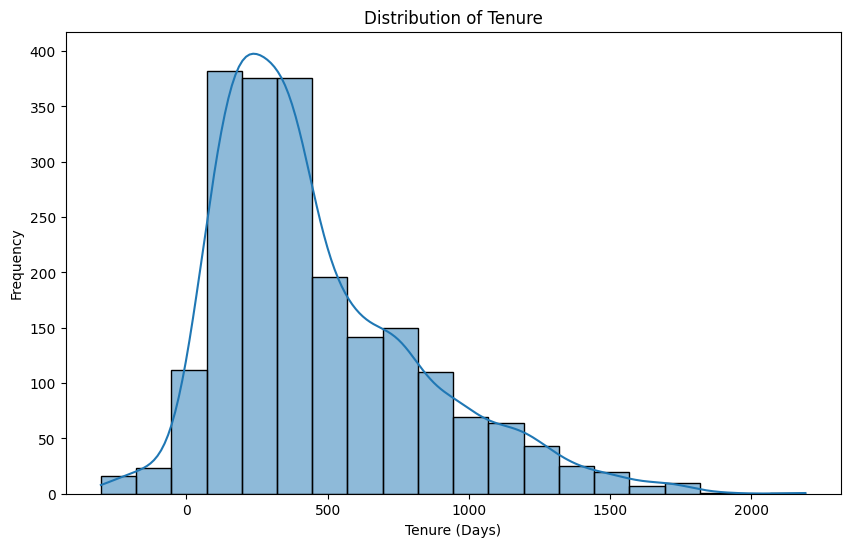

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df3['tenure'].dropna(), bins=20, kde=True)
plt.xlabel('Tenure (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.show()

In [ ]:
summary_statistics = df3['tenure'].describe()
print(summary_statistics)


count    2123.000000
mean      460.486576
std       362.710252
min      -303.000000
25%       184.000000
50%       365.000000
75%       641.000000
max      2192.000000
Name: tenure, dtype: float64


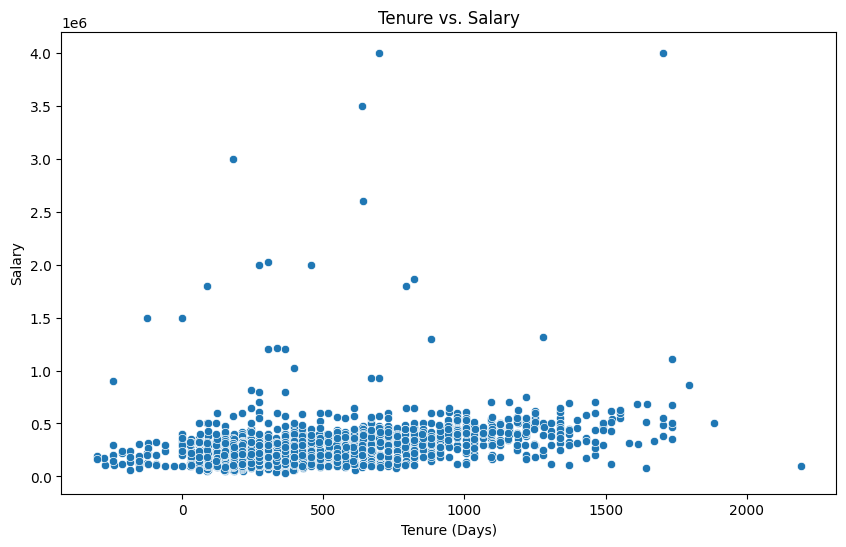

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x='tenure', y='Salary')
plt.xlabel('Tenure (Days)')
plt.ylabel('Salary')
plt.title('Tenure vs. Salary')
plt.show()


A greater tenure does not always mean better salary

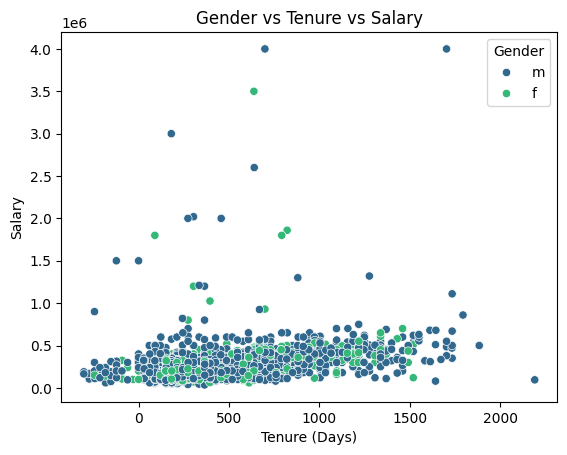

In [ ]:
sns.scatterplot(data=df3, x='tenure', y='Salary', hue='Gender', palette='viridis')
plt.xlabel('Tenure (Days)')
plt.ylabel('Salary')
plt.title('Gender vs Tenure vs Salary')
plt.legend(title='Gender')
plt.show()

CASE STUDY

Mean Salary of Fresh CSE Graduates with Specified Job Titles: 386730.76923076925
Claim Range: 2.5-3 lakhs

Chi-square Statistic: 104.46891913608455
p-value: 1.2453868176976918e-06
There is a significant relationship between gender and specialization.


C:\Users\hridy\AppData\Local\Temp\ipykernel_2304\2823270632.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cse_df['GraduationYear'] = cse_df['GraduationYear'].astype(int)
C:\Users\hridy\AppData\Local\Temp\ipykernel_2304\2823270632.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cse_df['DOJ'] = pd.to_datetime(cse_df['DOJ'])
C:\Users\hridy\AppData\Local\Temp\ipykernel_2304\2823270632.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

<Figure size 1000x600 with 0 Axes>

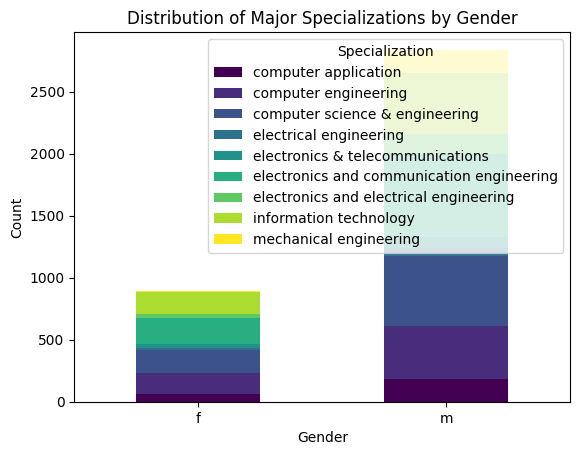

In [ ]:
from scipy.stats import chi2_contingency

# Filter the dataset for CSE graduates with specified job titles and check if they are freshers
cse_jobs = ['Programming Analyst', 'software engineer', 'hardware engineer', 'associate engineer']
cse_df = df[(df['Degree'] == 'B.Tech/B.E.') & (df['Specialization'] == 'computer engineering') & df['Designation'].isin(cse_jobs)]
cse_df['GraduationYear'] = cse_df['GraduationYear'].astype(int)
cse_df['DOJ'] = pd.to_datetime(cse_df['DOJ'])
cse_df['YearDifference'] = cse_df['DOJ'].dt.year - cse_df['GraduationYear']

freshers_df = cse_df[cse_df['YearDifference'] <= 1]
mean_salary_freshers = freshers_df['Salary'].mean()

print("Mean Salary of Fresh CSE Graduates with Specified Job Titles:", mean_salary_freshers)
print("Claim Range: 2.5-3 lakhs")

contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

chi2, p, _, _ = chi2_contingency(contingency_table)
print("\nChi-square Statistic:", chi2)
print("p-value:", p)
if p < 0.05:
    print("There is a significant relationship between gender and specialization.")
else:
    print("There is no significant relationship between gender and specialization.")
    
major_specializations = df['Specialization'].value_counts()[df['Specialization'].value_counts() >= 50].index
df_major_specializations = df[df['Specialization'].isin(major_specializations)]

contingency_table_major = pd.crosstab(df_major_specializations['Gender'], df_major_specializations['Specialization'])
plt.figure(figsize=(10, 6))
contingency_table_major.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Major Specializations by Gender')
plt.legend(title='Specialization')
plt.xticks(rotation=0)
plt.show()


interest in Specialization clearly differs for female and male

CASE STUDY 2

Identify Emerging Job Sectors and Opportunities
Based on the analysis, identifying job sectors with high average salaries and strong correlations between skills and salary
These job sectors may represent emerging areas with high demand for specific skills


C:\Users\hridy\AppData\Local\Temp\ipykernel_2304\100536560.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_data_df['Industry'] = job_data_df['Designation'].apply(categorize_job_title)


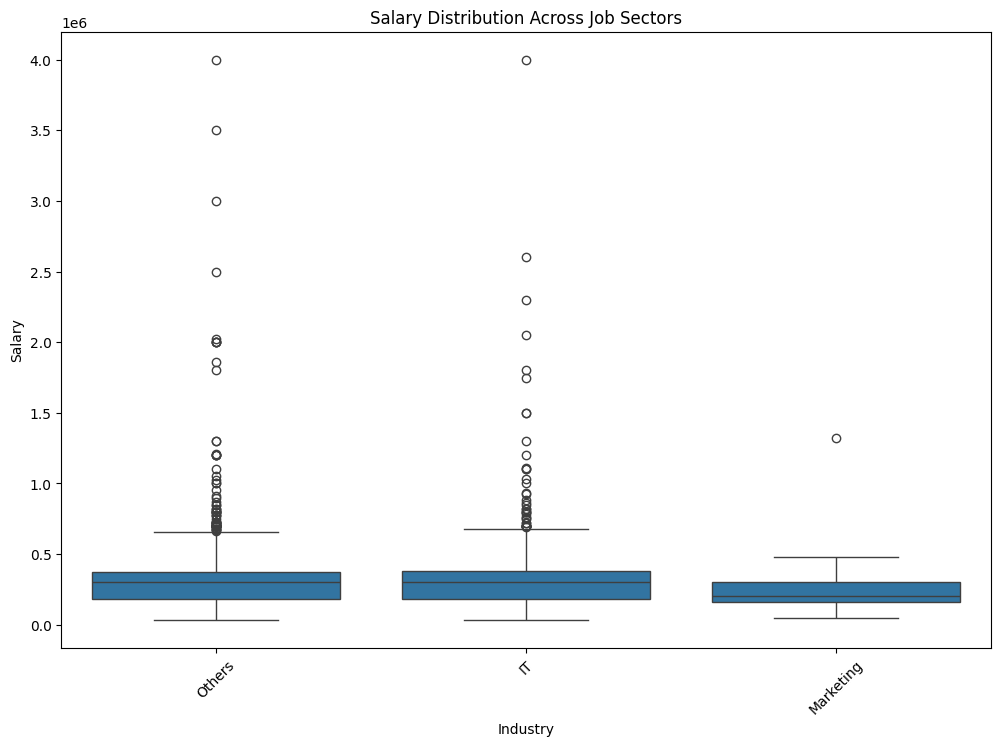

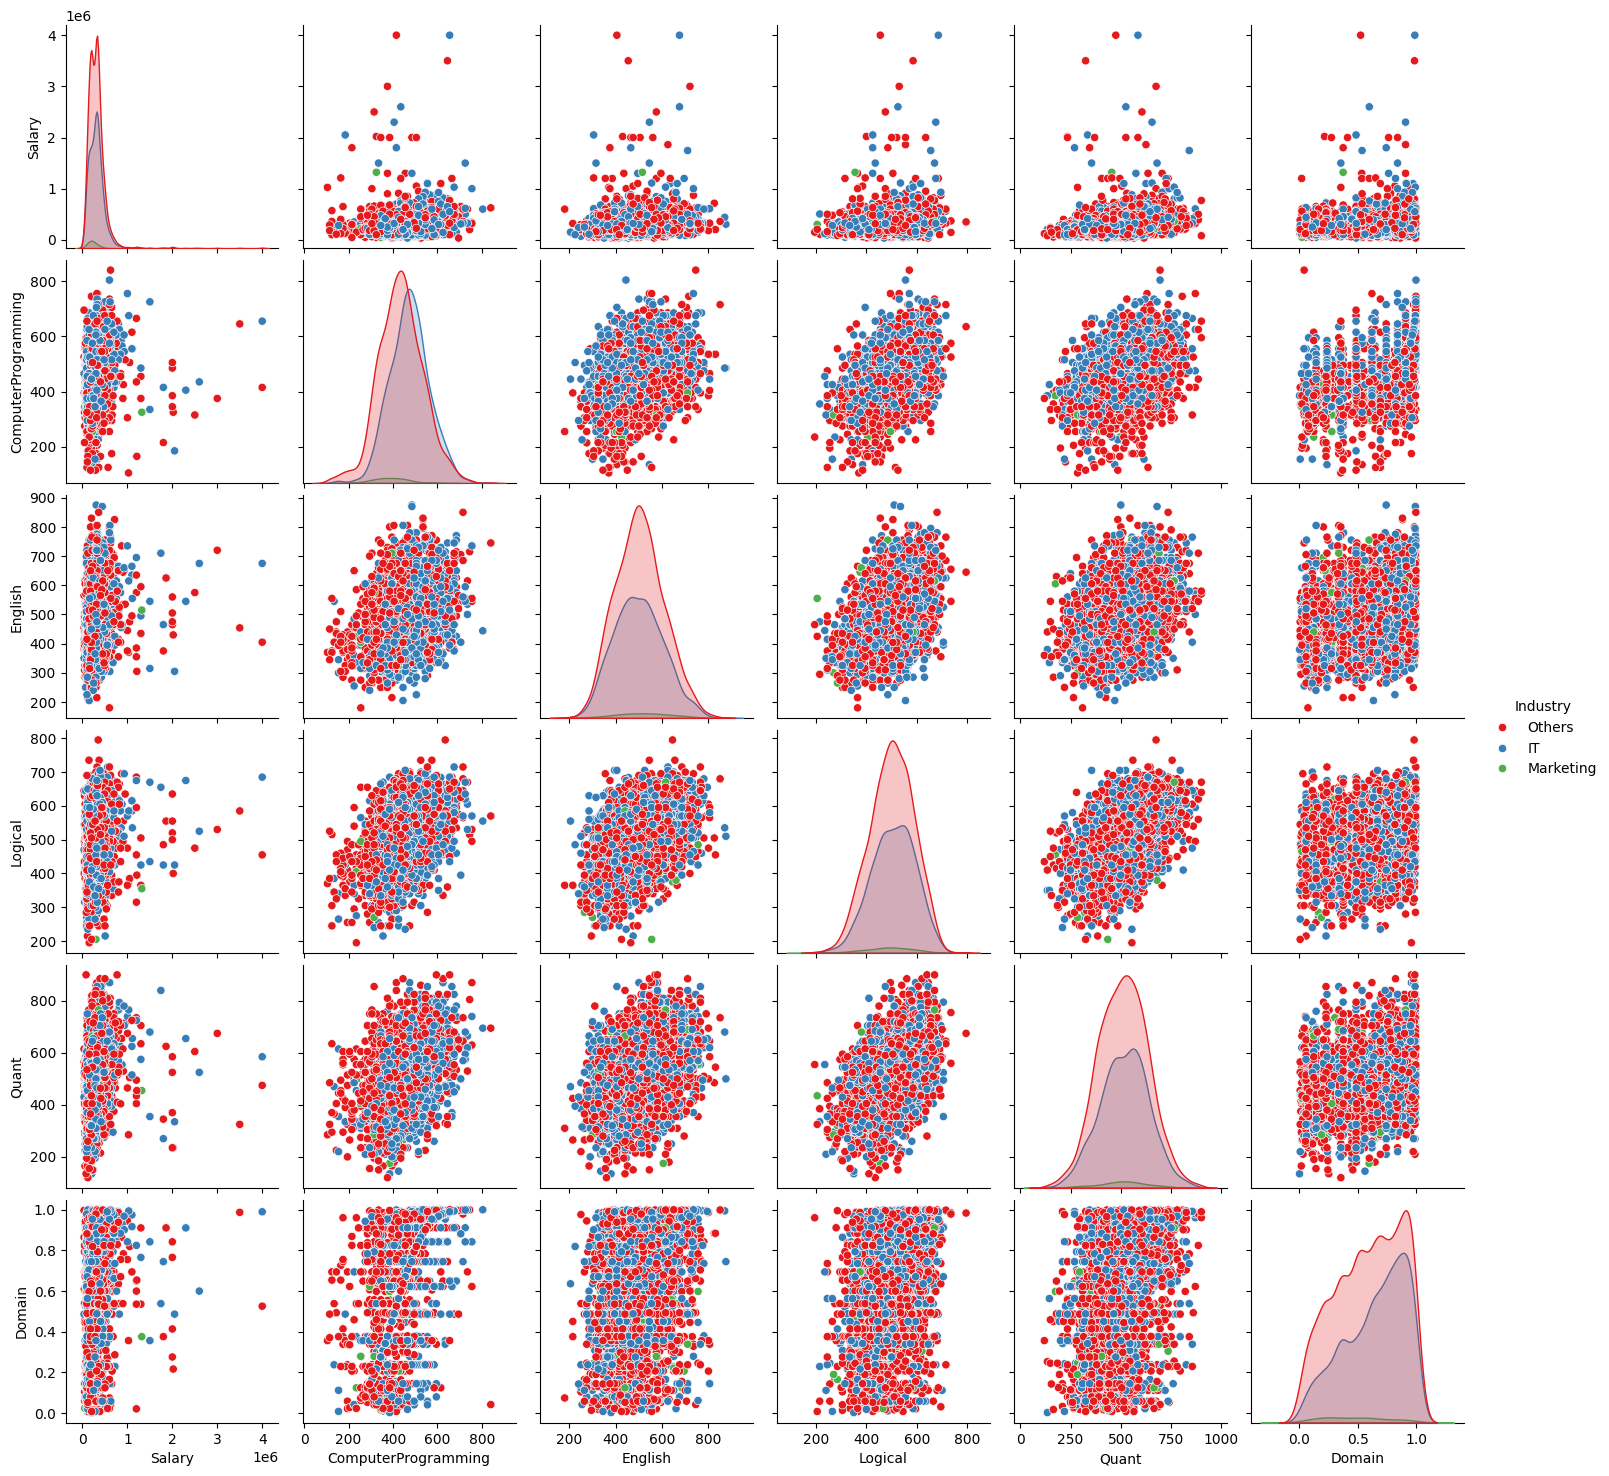

Average Salary by Job Sector:
Industry
IT           310425.950197
Others       307908.108108
Marketing    238134.328358
Name: Salary, dtype: float64


ValueError: could not convert string to float: 'senior software engineer'

In [ ]:

# Extract relevant columns related to job titles, salaries, and skills
job_data_columns = ['Designation', 'Salary', 'ComputerProgramming', 'English', 'Logical', 'Quant', 'Domain']
job_data_df = df2[job_data_columns]


# categorizing job titles into 'IT', 'Finance', 'Marketing', and 'Others'
def categorize_job_title(job_title):
    if 'software engineer' in job_title.lower() or 'developer' in job_title.lower():
        return 'IT'
    elif 'finance' in job_title.lower() or 'accountant' in job_title.lower():
        return 'Finance'
    elif 'marketing' in job_title.lower() or 'sales' in job_title.lower():
        return 'Marketing'
    else:
        return 'Others'

job_data_df['Industry'] = job_data_df['Designation'].apply(categorize_job_title)

plt.figure(figsize=(12, 8))
sns.boxplot(data=job_data_df, x='Industry', y='Salary')
plt.xticks(rotation=45)
plt.xlabel('Industry')
plt.ylabel('Salary')
plt.title('Salary Distribution Across Job Sectors')
plt.show()

# Pairplot to visualize relationships between skills and salary across job sectors
sns.pairplot(job_data_df, hue='Industry', palette='Set1')
plt.show()

# Example: Average salary for each industry
average_salary_by_industry = job_data_df.groupby('Industry')['Salary'].mean().sort_values(ascending=False)
print("Average Salary by Job Sector:")
print(average_salary_by_industry)

# Example: Correlation between skills and salary for each industry
correlation_by_industry = job_data_df.groupby('Industry').corr()['Salary'].loc['Salary'].drop('Salary')
print("\nCorrelation between Skills and Salary by Job Sector:")
print(correlation_by_industry)



Gender Pay Gap Analysis: Exploring whether there's a gender pay gap within specific industries or job roles. This can involve comparing the average salaries of male and female employees within the same job category and also to promote and encourage people to take up the job

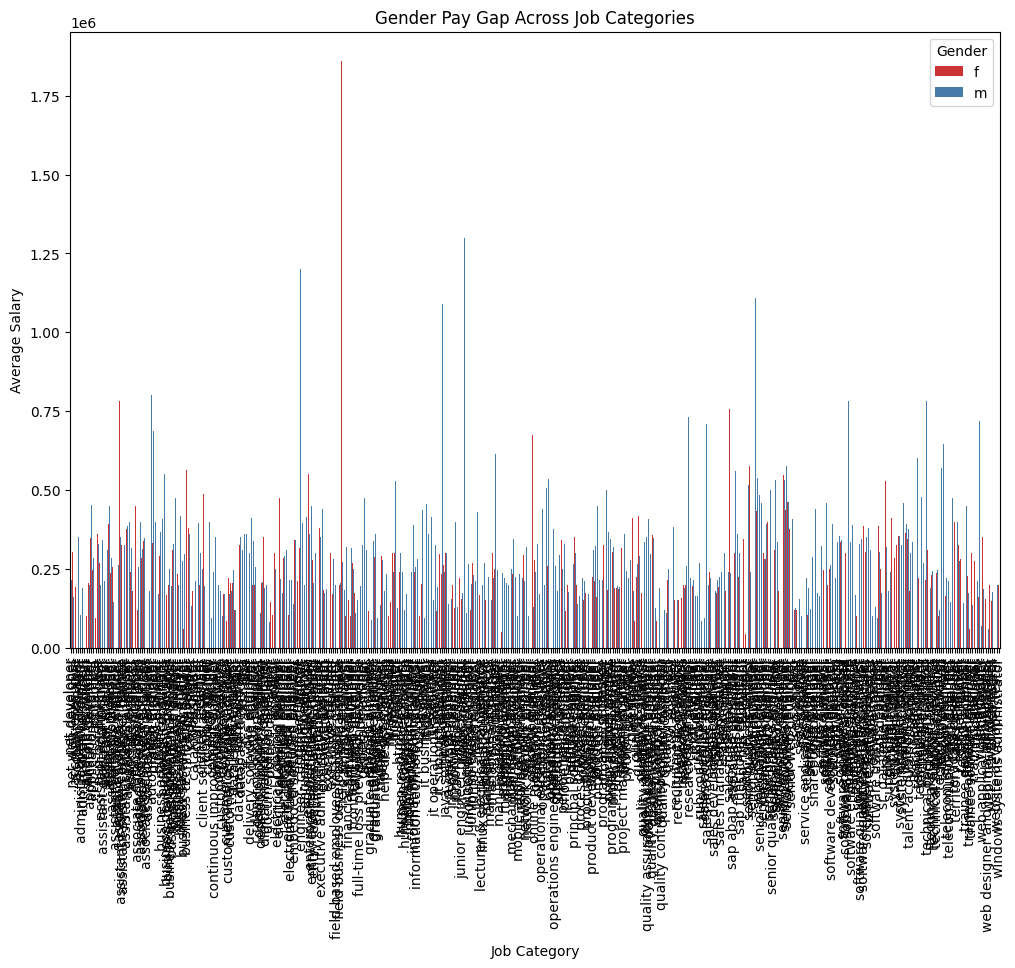

In [ ]:

gender_salary_df = df2[['Gender', 'Salary', 'Designation']]
gender_salary_df = gender_salary_df.dropna(subset=['Salary', 'Gender'])
average_salary_by_gender = gender_salary_df.groupby(['Designation', 'Gender'])['Salary'].mean().reset_index()

# Plot the gender pay gap within each job category
plt.figure(figsize=(12, 8))
sns.barplot(data=average_salary_by_gender, x='Designation', y='Salary', hue='Gender', palette='Set1')
plt.xticks(rotation=90)
plt.xlabel('Job Category')
plt.ylabel('Average Salary')
plt.title('Gender Pay Gap Across Job Categories')
plt.legend(title='Gender')
plt.show()


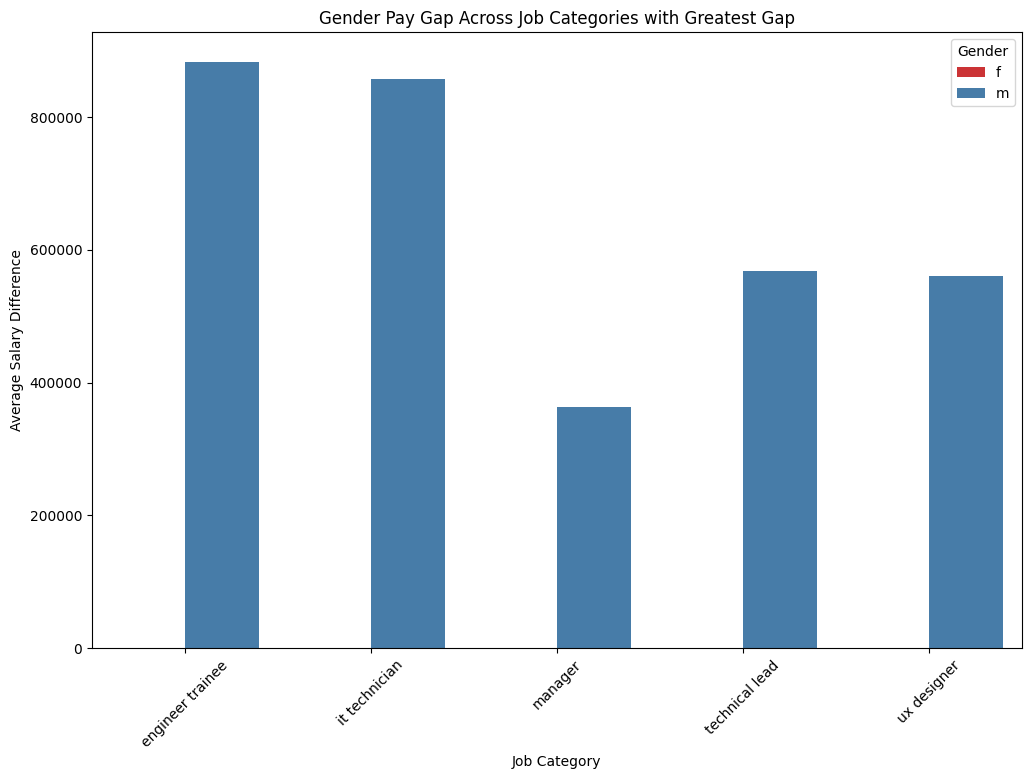

In [ ]:
average_salary_by_gender = gender_salary_df.groupby(['Designation', 'Gender'])['Salary'].mean().reset_index()

# Calculate the difference in average salary between genders for each job category
average_salary_by_gender['Salary_Difference'] = average_salary_by_gender.groupby('Designation')['Salary'].transform('diff')

# Find the job categories with the greatest gender pay gaps
job_categories_with_greatest_gap = average_salary_by_gender.groupby('Designation')['Salary_Difference'].mean().nlargest(5).index

# Filter the data to include only the job categories with the greatest gender pay gaps
filtered_data = average_salary_by_gender[average_salary_by_gender['Designation'].isin(job_categories_with_greatest_gap)]

# Plot the gender pay gap for the selected job categories
plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_data, x='Designation', y='Salary_Difference', hue='Gender', palette='Set1')
plt.xticks(rotation=45)
plt.xlabel('Job Category')
plt.ylabel('Average Salary Difference')
plt.title('Gender Pay Gap Across Job Categories with Greatest Gap')
plt.show()


Trend Analysis: Identifying trends in hiring practices, salary trends, and skill requirements over time providing insights on market trends and in demand skills

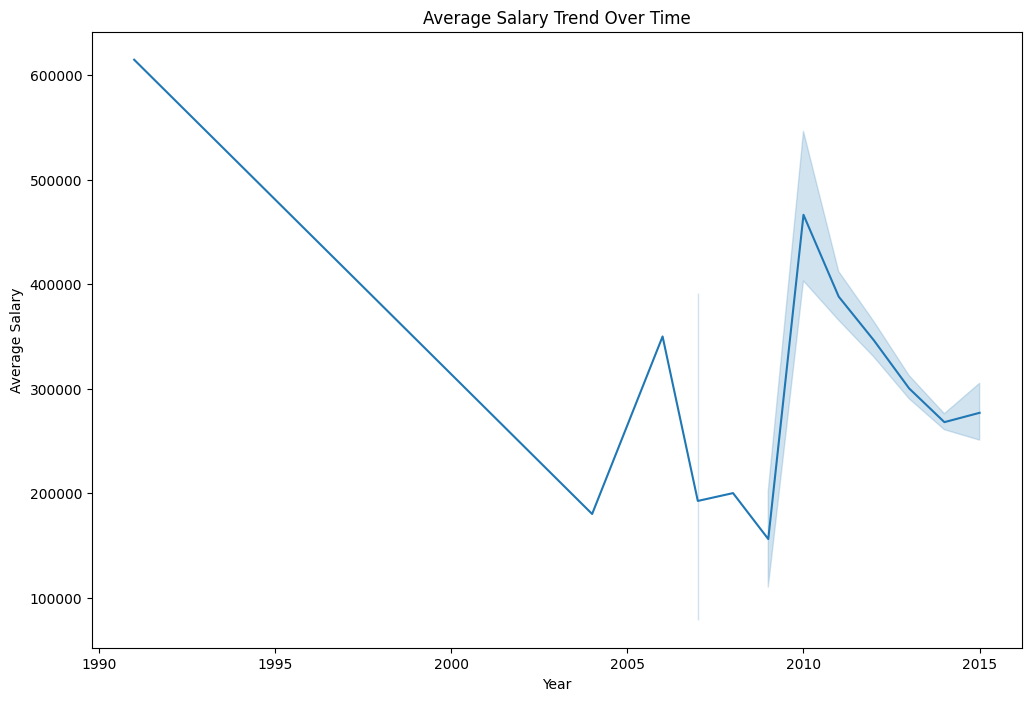

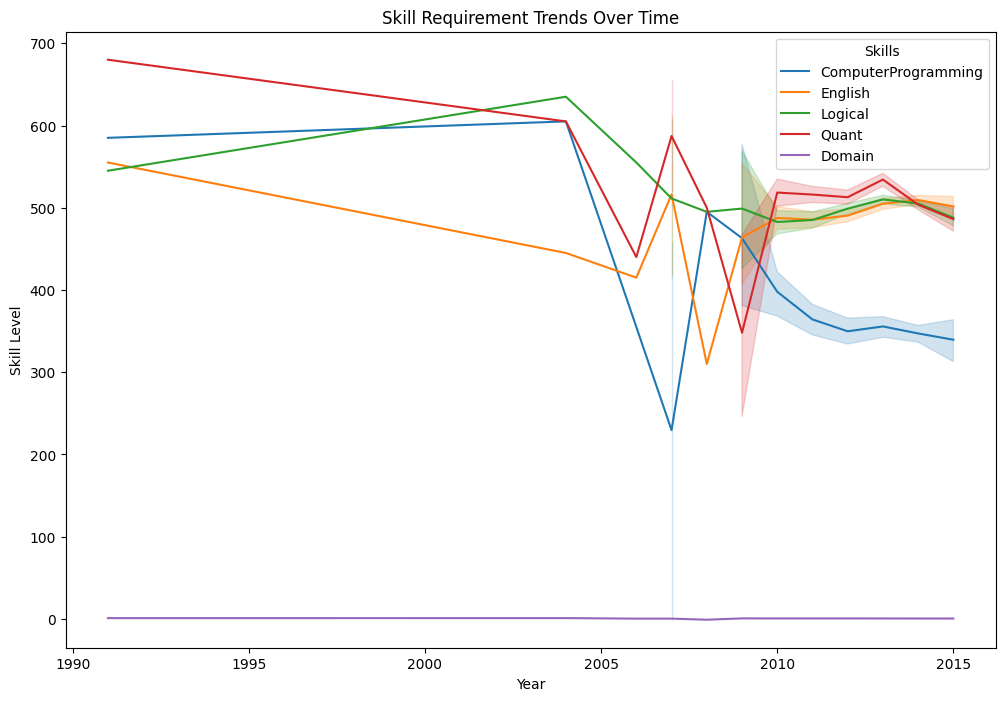

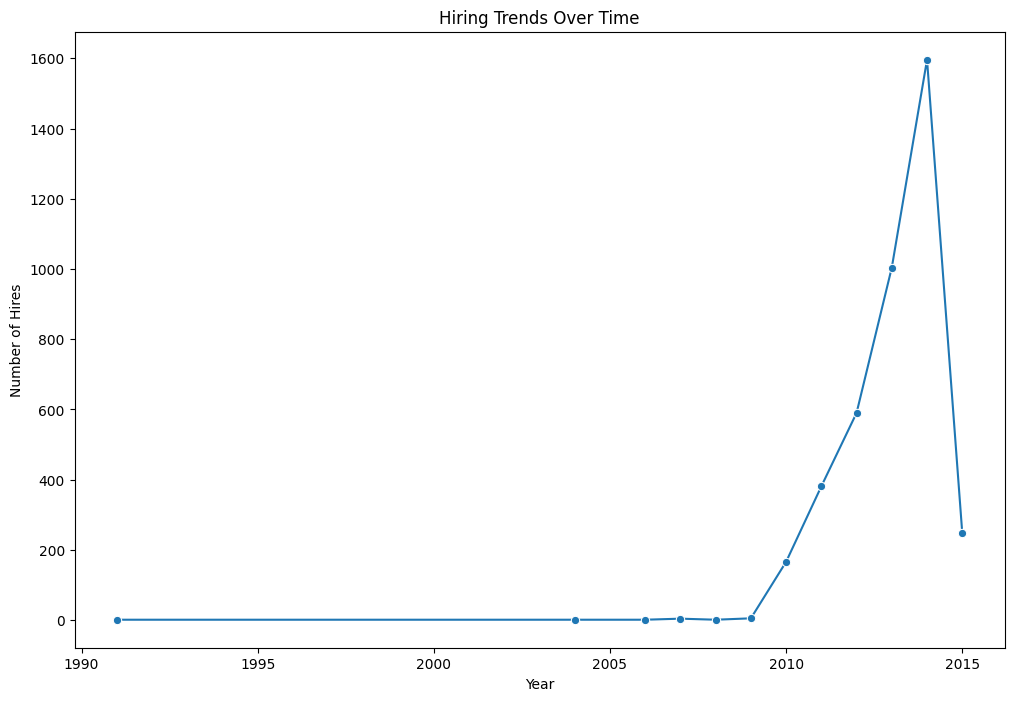

In [ ]:
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['Year'] = df['DOJ'].dt.year

trend_data_columns = ['Year', 'Designation', 'Salary', 'ComputerProgramming', 'English', 'Logical', 'Quant', 'Domain']
trend_data_df = df[trend_data_columns]
trend_data_df = trend_data_df.dropna()

plt.figure(figsize=(12, 8))
sns.lineplot(data=trend_data_df, x='Year', y='Salary', estimator='mean')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.title('Average Salary Trend Over Time')
plt.show()

skills_columns = ['ComputerProgramming', 'English', 'Logical', 'Quant', 'Domain']
plt.figure(figsize=(12, 8))
for skill in skills_columns:
    sns.lineplot(data=trend_data_df, x='Year', y=skill, estimator='mean', label=skill)
plt.xlabel('Year')
plt.ylabel('Skill Level')
plt.title('Skill Requirement Trends Over Time')
plt.legend(title='Skills')
plt.show()

# Count of people hired over time
hiring_trends_df = trend_data_df.groupby('Year').size().reset_index(name='Number of Hires')
plt.figure(figsize=(12, 8))
sns.lineplot(data=hiring_trends_df, x='Year', y='Number of Hires', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.title('Hiring Trends Over Time')
plt.show()
